# Module 3
# Data Analysis and Visualisations
We will start by loading all the librarieswe will need, some additional libraries will be loaded futher on towards the end of the notebook to draw the maps, but for now we need those below.

In [1]:
import sys
import time
import re
import matplotlib as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
%matplotlib inline
import cufflinks as cf

Then we load the `.csv` files poduced by the Data Preparation Notebook.

In [2]:
merged_df = pd.read_csv('full.csv') # the whole data
gap_df = pd.read_csv('gap.csv')     # GAP citations
pac_df = pd.read_csv('pac.csv')     # GAP Packages citations

We can choose plotting style according to preference.

In [3]:
print(plt.style.available) # prints a list of what we have available

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [4]:
plt.style.use('fivethirtyeight') # we set the style as per our choice

In [161]:
pd.options.display.float_format = "{:,.2f}".format # to show only two digits after the decimal point in tables

# Now we start analysing single or combined features of the data, using tables and visyalisations.
### Website

We are starting with simple visualisations. The code below counts the occurances of the two values for the Website column, then displays the result in a horizontal bar chart.

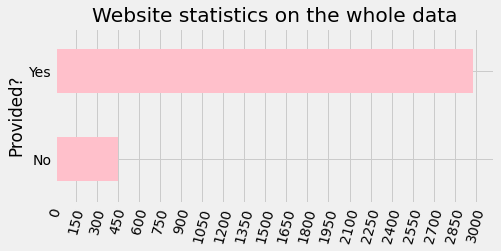

In [5]:
web_chart = merged_df['Website'].value_counts()
web_chart = web_chart.sort_values(ascending=True)
web_chart.plot(kind="barh", figsize=(7, 3),
               title='Website statistics on the whole data', 
                xlabel='Provided?', ylabel='Count', color='pink',
                          )
plt.xticks(range(0, 3100, 150))
plt.xticks(rotation=75)
plt.show()

From approximately 3500 entries in our full dataset, 3000 GAP citations have provided some sort of Website. It is good that the majority of citers have done soe, because the presence of website reference in a software citation is vital, especially when a reader of citing publication wishes to learn more about the software, its versions, releases, price and usage.

Below I created another representation of the same data, this time in a pie chart. Here we do not see the exact count but percentage ratios are displayed in each slice of the pie.

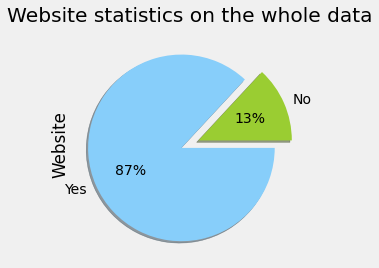

In [6]:
colors = ['yellowgreen', 'lightskyblue']
explode = (0.1, 0.1)
web_chart.plot(kind="pie", colors=colors, shadow=True,
               title='Website statistics on the whole data', 
               autopct='%1.0f%%', explode=explode)
plt.show()

Below we have the same type of visualisation but for the two subsets of our data. First is the website statistics for GAP software citations and then for GAP Package citations only. 

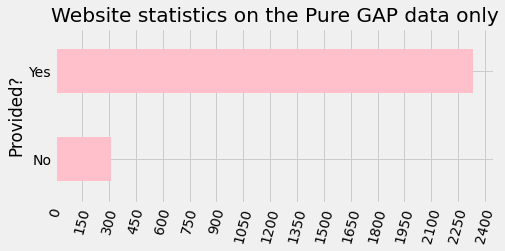

In [7]:
web_gap = gap_df['Website'].value_counts()
web_gap = web_gap.sort_values(ascending=True)
web_gap.plot(kind="barh", figsize=(7, 3),
             title='Website statistics on the Pure GAP data only', 
               xlabel='Provided?', ylabel='Count', color='pink')
plt.xticks(range(0, 2500, 150))
plt.xticks(rotation=75) 
plt.show()

GAP Package is based on GAP and sometimes similar, but in reality it is a separate piece of software and as we will see in the raw data Package citations are slightly different. For isntace most of them provide a website reference which is different from the official https://www.gap-system.org/ . Another difference is observed in the versions - most package citations either do not mention version or if they do it is version of the package used, not of the GAP release it is based on.

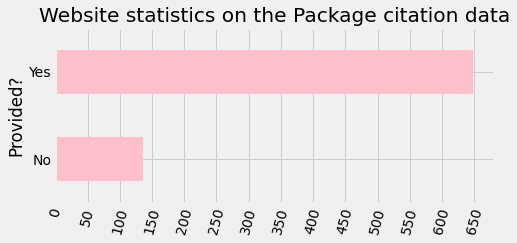

In [8]:
web_pac = pac_df['Website'].value_counts()
web_pac = web_pac.sort_values(ascending=True)
web_pac.plot(kind="barh", figsize=(7, 3),
             title='Website statistics on the Package citation data', 
                xlabel='Provided?', ylabel='Count', color='pink')
plt.xticks(range(0, 700, 50))
plt.xticks(rotation=75) 
plt.show()

##### Website statistics grouped by Year, for the full dataset - this allows us to compare the number of publications who did and did not provide Website in their citations, for each year.

From the beginning of data gathering in 1992, to 2001 the number of citations lacking website reference was prevailing. After 2001 we are observing two drastic changes in the data, first the number of citations significantly increases and second most of the new citations provide a website, while the number of those lacking website decreases and remains low.

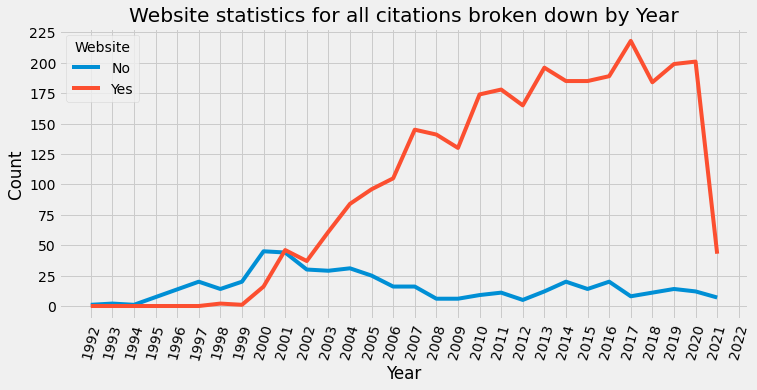

In [9]:
site_year = merged_df.groupby(['Website', 'Year'])['Year'].count().unstack('Website').fillna(0)
site_year_df = pd.DataFrame(data=site_year)
site_year_df.plot(kind='line', ylabel='Count', figsize=(11, 5),
                  title='Website statistics for all citations broken down by Year' 
                 )

plt.xticks(np.arange(1992, 2023, 1))
plt.xticks(rotation=75)
plt.yticks(np.arange(0, 250, 25))
plt.show()

Below we can see the same statistics represented in a bar chart.

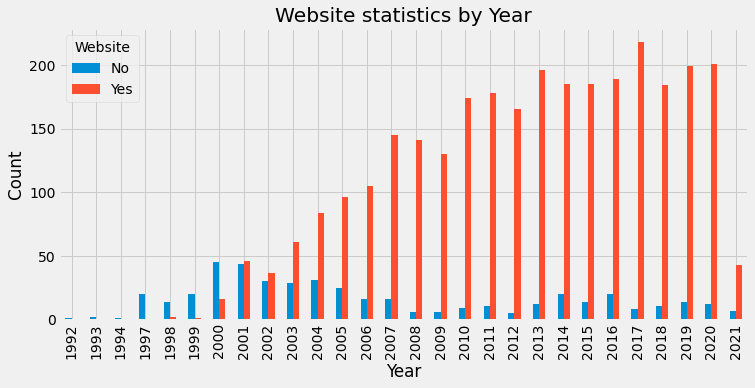

In [10]:
site_year_df.plot(kind="bar", subplots=False, figsize=(11, 5),
                  title='Website statistics by Year', 
                  xlabel='Year', ylabel='Count')
plt.show()

* We can see that in the beginning, up to 2000 the number of citations without a website reference was much higher. Then this trend reverses. On this barchart we can also observe the sharp increase of recorded citations altogether starting from 1997 and reaching a pique in 2017. 

# Website statistic for selected dataset

First we create a list containing the names of our 3 dataframes.<br>
Then we employ that list as a dropdown in an interactive line chart. Depending on user selection, the specified data-frame is visualised.

In [11]:
df_list = ['Full Data', 'GAP Data', 'Package Data']

In [12]:
@interact
def jour_df_selector(Dataset = df_list):
    if Dataset == 'GAP Data':
        site_year = gap_df.groupby(['Website', 'Year'])['Year'].count().unstack('Website').fillna(0)
        site_year_df = pd.DataFrame(data=site_year)
        site_year_df.plot(kind='line', ylabel='Count', figsize=(11, 5),
                          title='Website statistics for GAP software citations broken down by Year' 
                         )

        plt.xticks(np.arange(1992, 2023, 1))
        plt.xticks(rotation=75)
        plt.yticks(np.arange(0, 250, 25))
        
        return plt.show()
    if Dataset == 'Full Data':
        site_year = merged_df.groupby(['Website', 'Year'])['Year'].count().unstack('Website').fillna(0)
        site_year_df = pd.DataFrame(data=site_year)
        site_year_df.plot(kind='line', ylabel='Count', figsize=(11, 5),
                          title='Website statistics for all citations broken down by Year' 
                         )

        plt.xticks(np.arange(1992, 2023, 1))
        plt.xticks(rotation=75)
        plt.yticks(np.arange(0, 250, 25))
        
        return plt.show()
    if Dataset == 'Package Data':
        site_year = pac_df.groupby(['Website', 'Year'])['Year'].count().unstack('Website').fillna(0)
        site_year_df = pd.DataFrame(data=site_year)
        site_year_df.plot(kind='line', ylabel='Count', figsize=(11, 5),
                          title='Website statistics for GAP Package citations broken down by Year' 
                         )

        plt.xticks(np.arange(1992, 2023, 1))
        plt.xticks(rotation=75)
        plt.yticks(np.arange(0, 250, 25))
        
        return plt.show()


interactive(children=(Dropdown(description='Dataset', options=('Full Data', 'GAP Data', 'Package Data'), value…

Using this tool we can focus on the Package citations only, where the good practice of mentioning a website only really increased in 2005, which is 4 years later than when it happened with the pure GAP citations.

### Length
Here we visualise the `Length` column we created, using a Histogram. <br>
Looking at it, we can see that most citations are around 105 characters long - more than 1100 records.

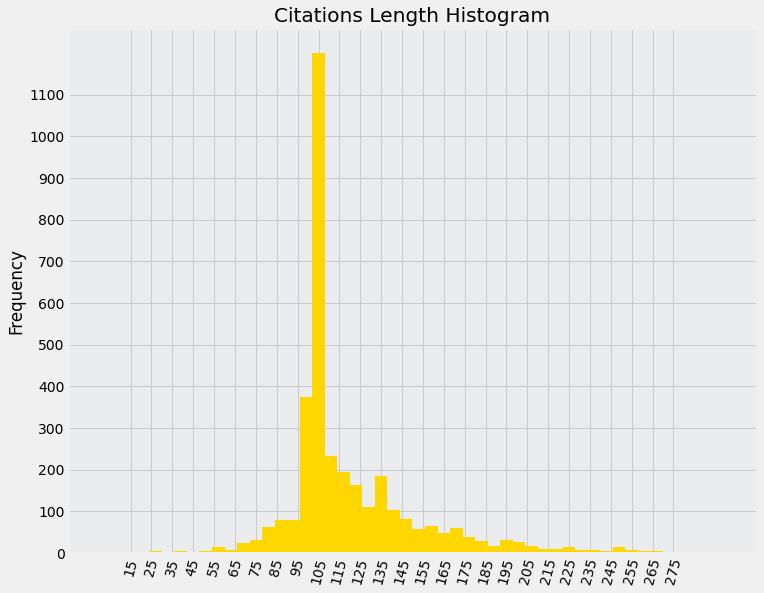

In [13]:
cit_len = merged_df['Length'].plot(kind='hist', bins=50,
                         figsize=(11,9), stacked=True, 
                         range=(0, 300), 
                         color='gold', 
                         title='Citations Length Histogram', 
                         xlabel="length")
cit_len.set_facecolor('#ebeced')
plt.xticks(np.arange(15, 285, 10))
plt.xticks(rotation=75)
plt.yticks(np.arange(0, 1200, 100))
plt.show()

We can also draw a line chart displaying the average length per year. For this purpose we group our data by year and take the mean of the length column, then transform the result to a pandas dataframe and plot it.  

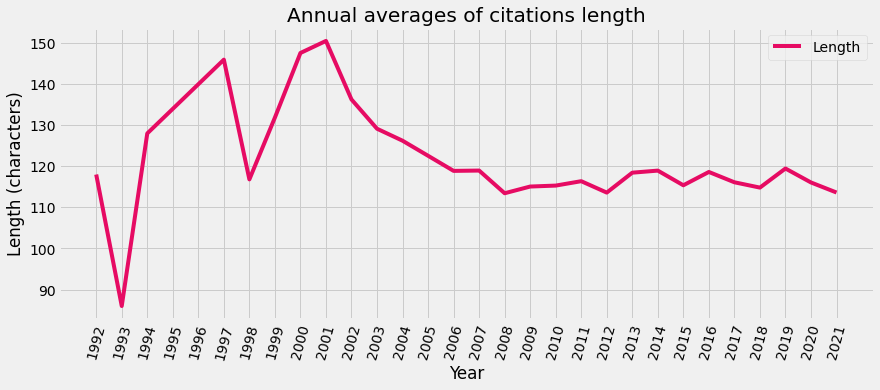

In [14]:
length_average = merged_df.groupby('Year')['Length'].mean()
length_average = pd.DataFrame(data=length_average)
length_average.plot(kind='line', figsize=(13, 5),
         title='Annual averages of citations length',
         xlabel='Year', ylabel='Length (characters)', color='#e60b63')
plt.xticks(range(1992, 2022, 1))
plt.xticks(rotation=75)
plt.show()

* In the first years, up to 2000 we only have very few records per year, therefore the average is volatile and strongly fluctuating. After that it decreases and starts stabilizing between 2000 and 2005. From 2005 onwards until today the average GAP Citations length remains stable in the range between 110 and 120 characters. This stable trend in the last 16 years proves that a widespread, potentially global standard for designing GAP citations has formed.

### Scatter plot displaying length of citations by year.
Here we simply plot length by year taken directly from the main dataset. We are using scatterplot because there are too many data points to be displayed otherwise.

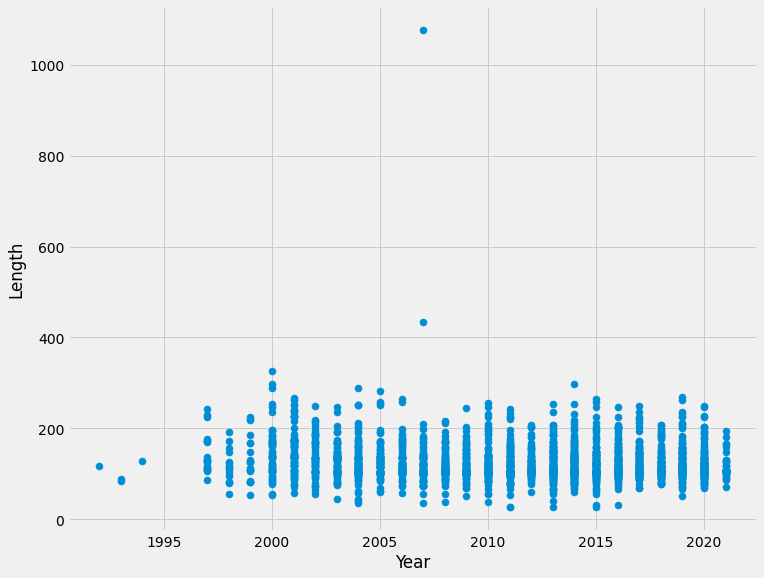

In [15]:
merged_df.plot(kind='scatter', y = 'Length', x = 'Year', figsize=(11,9),
              s=50)
plt.show()

In [16]:
merged_df[merged_df['Length']>400] # we isolate the outliers

,MR,Author,Journal,Year,Publication Type,MSC,Citation,Version,Website,Length,Accuracy Score
271,2299794,"Assmann, B. and Eick, B.",Math. Comp.,2007,article,20F16 (20-04),"The GAP Group. GAP–Groups, Algorithms and Prog...",Unknown,Yes,434,2
752,2351139,"Cameron, P. and Cilleruelo, J. and Serra, O.",Rev. Mat. Iberoam.,2007,article,05D10,"[1] Datskovsky, B. A.: On the number of monoch...",4.3,Yes,1076,3


* We have two outliers, one of them is an error and the other one is citing GAP but mentioning both St Andrews and Braunschweig universities, along with their full contact details, which is making it too long. We will remove these two entries to make the scatter plot more clear.

In [17]:
print(merged_df.iloc[758]['Citation'])
print(merged_df.iloc[272]['Citation'])

The GAP group, GAP-groups, algorithms, and programming, Version 4.4.12, 2008, http://www.gap-system.org.
B. Assmann, Guarana—Applications of Lie methods in computational group theory, 2006, A GAP 4 package, see [23].


In [18]:
outliers = merged_df[merged_df['Length']>400].index
len_scatter = merged_df.drop(outliers)
len_scatter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3428 entries, 0 to 3429
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   MR                3428 non-null   int64 
 1   Author            3428 non-null   object
 2   Journal           3428 non-null   object
 3   Year              3428 non-null   int64 
 4   Publication Type  3428 non-null   object
 5   MSC               3428 non-null   object
 6   Citation          3428 non-null   object
 7   Version           3428 non-null   object
 8   Website           3428 non-null   object
 9   Length            3428 non-null   int64 
 10  Accuracy Score    3428 non-null   int64 
dtypes: int64(4), object(7)
memory usage: 227.6+ KB


Below is the updated plot. Without the outliers, the result is much more "zoomed in" and we can focus and study the data in more detail.

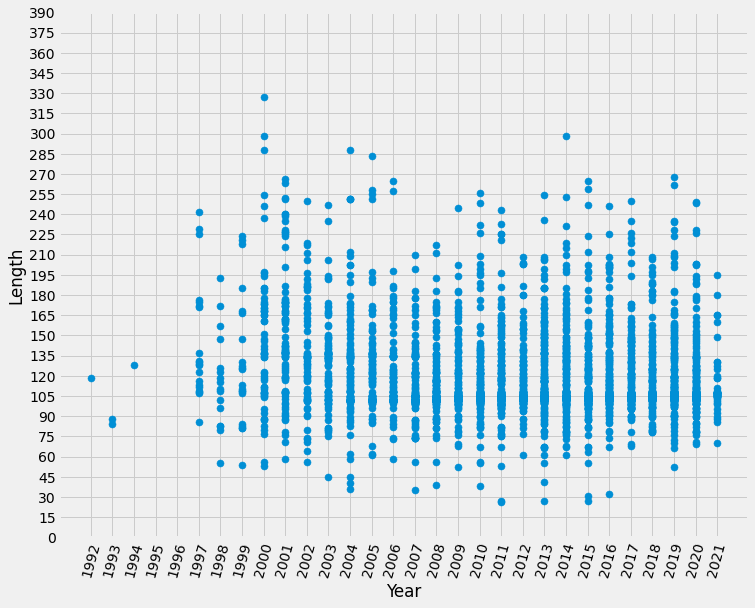

In [19]:
len_scatter.plot(kind='scatter', y = 'Length', x = 'Year', figsize=(11,9),
              s=50, xticks = range(1992, 2022, 1),
              yticks = range(0, 400, 15))
plt.xticks(rotation=75)
plt.show()                       

We observe that the length of citations widely varies during each year. The highest concentration of datapoints is around 105 (citation length) but they range from 30 to 330. Let us investigate the data and find out some more information about the shortest and longest citations.

First we will define a function initially used in the data preparation notebook, so we can display and analyse separate entries from our dataset.

In [20]:
# Python lectures by Dr Konovalov 
# https://studres.cs.st-andrews.ac.uk/CS2006/Lectures/Python/L08-dataset.pdf
# slightly modified so it can return all citations with the specified MRN
# on the other hand the result is a dataframe and if we want to read the full citation text we need to ise `.iloc` with the index
def get_c(mrno):
    r = merged_df[merged_df['MR'] == mrno]
    return r

Then we create two subsets, shorter than 30 characters and longer than 300 characters.

In [21]:
sma = merged_df[merged_df['Length'] < 30]
big = merged_df[merged_df['Length'] > 300]
print(len(sma))
print(len(big))

4
3


In [22]:
sma

,MR,Author,Journal,Year,Publication Type,MSC,Citation,Version,Website,Length,Accuracy Score
3393,3063476,"García Pillado, C. and González, S. and Martín...",J. Algebra Appl.,2013,article,94B60 (20C05 94B25),http://www.gap-system.org/.,Unknown,Yes,27,1
3394,2904286,"Garsia-Pilʹyado, K. and Gonsales, S. and Marko...",Fundam. Prikl. Mat.,2011,article,94B60 (20C05),http://www.gap-system.org/.,Unknown,Yes,27,1
3397,3451663,"Garsia-Pilʹyado, K. and Gonsales, S. and Marko...",Fundam. Prikl. Mat.,2015,article,94A60 (20D99),http://www.gap-system.org/.,Unknown,Yes,27,1
3411,2822510,"Kornyak, V. V.",Zap. Nauchn. Sem. S.-Peterburg. Otdel. Mat. In...,2011,article,81P05,http://www.gap-system.org.,Unknown,Yes,26,1


Afer a quick glance we can easily distinguish that the shortest citations in our records contain simply just the official GAP website and no other information. <br>
Another important feature is that 3 out of the 4 are articles by the same group of authors. It seems at the time of citing, these authors were under the impression that providing only a website is good enough. <br>
It is a fun fact to note that all the shortest citations even got one accuracy point, by our Accuracy Score calculator, because after all they do mention the GAP website, even though it is the only bit of information they have.

In [23]:
big

,MR,Author,Journal,Year,Publication Type,MSC,Citation,Version,Website,Length,Accuracy Score
271,2299794,"Assmann, B. and Eick, B.",Math. Comp.,2007,article,20F16 (20-04),"The GAP Group. GAP–Groups, Algorithms and Prog...",Unknown,Yes,434,2
752,2351139,"Cameron, P. and Cilleruelo, J. and Serra, O.",Rev. Mat. Iberoam.,2007,article,05D10,"[1] Datskovsky, B. A.: On the number of monoch...",4.3,Yes,1076,3
3426,1801202,"Shaw, R.",Des. Codes Cryptogr.,2000,incollection,51E14,"L.H. Soicher, GRAPE: a system for computing wi...",Package,Yes,327,3


The middle row with index 752 which is over 1000 characters long is just an error along the pipeline - accidentaly all citations of the publication got into the GAP citation text, so we can rule that out.

In [24]:
print(merged_df.loc[758]['Citation'])

The GAP group, GAP-groups, algorithms, and programming, Version 4.4.12, 2008, http://www.gap-system.org.


The first citation with index 272 is so long because it mentions the two main bases of GAP, namely University of St Andrews and Universität Braunschweig along with full contact details for both.

In [25]:
print(merged_df.loc[272]['Citation'])

B. Assmann, Guarana—Applications of Lie methods in computational group theory, 2006, A GAP 4 package, see [23].


The last citation is for the GRAPE GAP package, but it also refers to a journal including all its details such as name, volume, page etc

In [26]:
print(merged_df.loc[3426]['Citation'])

L.H. Soicher, GRAPE: a system for computing with graphs and groups, in: L. Finkelstein and W.M. Kantor, eds., Groups and Computation, DIMACS Series in Discrete Mathematics and Theoretical Computer Science Vol. 11, AMS, (1993) pp. 287–291. GRAPE is available from http://www-gap.dcs.st-and.ac.uk/gap/Share/grape.html. 
MR1235810


Now we can extend our review and look up citations shorter than 75 characters. Scrolling along the resulting filtered dataset we see that these are mostly citations which mention the software name, along with a website or a version but not both. Others are GAP Package citations mentioning the package name along with its release year and sometimes its specific version.  Looking at the `Author` and `Journal` columns we cannot see any commonly repeating names, therefore we cannot conclude that too long or too short because of the author(s) who created them or the journal they come from.

In [27]:
sma1 = merged_df[merged_df['Length'] < 70]
sma1

,MR,Author,Journal,Year,Publication Type,MSC,Citation,Version,Website,Length,Accuracy Score
21,2726552,"Abdollahi, A. and Khosravi, H.",J. Algebra Appl.,2010,article,20F45 (20F18),"W. Nickel, NQ, 1998, A refereed GAP 4 package,...",Package,No,56,1
28,3297734,"Abdollahi, A.",J. Group Theory,2015,article,20F45,"W. Nickel, NQ, 1998, A refereed GAP 4 package,...",Package,No,55,1
250,2176489,"Ash, A. and Pollack, D. and Sinnott, W.",J. Number Theory,2005,article,11F80,"GAP4, Version: 4.3fix4. Available: http://www....",4.3,Yes,61,2
273,2358616,"Assmann, B. and Linton, S.",J. Algebra,2007,article,20F40 (20F05),"W. Nickel, NQ, 1998, A refereed GAP 4 package,...",Package,No,56,1
347,2864860,"Balagović, M. and Policastro, C.",J. Pure Appl. Algebra,2012,article,16S99 (16D90 16G10 16Z05 20C08),"J. Michel, GAP Manual http://www.math.jussieu....",Unknown,Yes,61,1
352,3092787,"Ballester-Bolinches, A. and Cosme-Llópez, E. a...",Cent. Eur. J. Math.,2013,article,20D10 (20D20),"The GAP Group, GAP–Groups, Algorithms, Program...",4.5.7,No,66,1
644,3985485,"Breuer, T. and Hiss, G. and Lübeck, F. and Lux...",Math. Comp.,2019,article,20C20 (20-08 20C33),"L. Maas and F. Noeske, moc, MOC for GAP, unr...",Package,No,66,1
874,2242478,"Chesnokov, A. A. and Haemers, W. H.",Linear Algebra Appl.,2006,article,05C50,"GAP—Groups, Algorithms and Programming, Versio...",4.3,No,58,1
878,2824088,"Chossat, P. and Faye, G. and Faugeras, O.",J. Nonlinear Sci.,2011,article,37L10 (35K25 35K58 37G40 37N25 92C20),"GAP: Groups, algorithms and programming, http:...",Unknown,Yes,67,1
998,3080203,"Daoud, B. and Hamitouche, M. and Merikhi, K.",Mediterr. J. Math.,2013,article,20F18,"W. Nickel, NQ, 1998, A refereed GAP 4 package....",Package,No,55,1


In [28]:
print(merged_df.loc[880]['Citation'])
print(merged_df.loc[2240]['Citation']) 

GAP. "GAP—Groups, Algorithms and Programming, Version 4.4.10, 2007." The GAP Group. http://www.gap-system, org.
The GAP Group, GAP—Groups, Algorithms, and Programming, Version 4.4.12, http://www.gap-system.org, 2008.


### Version

We will use StrictVersion on `ver` series below to sort the versions semantically, because we need them to be displayed in chronological order.

In [29]:
from distutils.version import StrictVersion

In [30]:
ver = gap_df['Version'].value_counts()
ver = ver.head(35)
ver = ver.to_frame()
ver = ver.drop(['Unknown']) # we remove Unknown row.
ver = ver.reindex(index=pd.Index(sorted(ver.index, key=StrictVersion)))
ver_return = pd.DataFrame([[482]], columns=['Version'], index=['Unknown']) # we add it again after sorting is finished
ver = pd.concat([ver_return, ver])
ver

,Version
Unknown,482
3.4,30
4.1,32
4.2,122
4.3,211
4.4,441
4.4.9,75
4.4.10,135
4.4.12,304
4.5.4,13


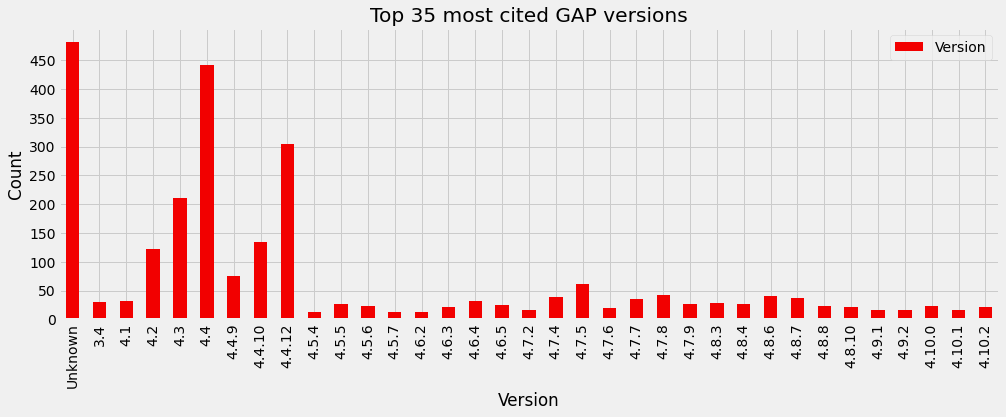

In [31]:
ver = gap_df['Version'].value_counts()
ver = ver.head(35)
ver = ver.to_frame()
ver = ver.drop(['Unknown'])
ver = ver.reindex(index=pd.Index(sorted(ver.index, key=StrictVersion)))
ver_return = pd.DataFrame([[482]], columns=['Version'], index=['Unknown'])
ver = pd.concat([ver_return, ver]) 
#ver = ver.dropna()
ver.plot(kind="bar", figsize=(15, 5), title='Top 35 most cited GAP versions',
         xlabel='Version', 
         ylabel='Count', color='#f20000')
plt.yticks(np.arange(0, 500, 50))
plt.show()

* In this bar chart we can see that the most popular GAP versions cited are subversions of GAP 4, between 4.2 and 4.4

### Interactive chart displaying number of records for each version for selected Year.

Creating and sorting a list of years fo our drop-down menu.

In [32]:
years_list = gap_df['Year'].unique()
years_list = np.sort(years_list)[::-1] #sort the NumPy array in descending order
#years_list

In this visualisation we will ommit the data for 'Unknown' version, because if it is present, due to its large number, bars for other versions are rendered to only several milimeters, which makes readability unacceptably poor. Nevertheless you can find a breakdown of `Unknown` version numbers by year in the next interactive visualisation, by selecing "Unknown" from the version dropdown.

In [33]:
@interact
def ver_by_year(Year=years_list):
    to_plot = gap_df[gap_df['Year']==Year]
    ver = to_plot['Version'].value_counts()
    ver = ver.to_frame()
    ver = ver.drop(['Unknown']) # thus we remove the Unknown version numbers
    ver = ver.reindex(index=pd.Index(sorted(ver.index, key=StrictVersion))) # semantic version sorting
    ver.plot(kind="bar", figsize=(15, 5),
             title='Cited GAP version for selected year',
             xlabel='Version', 
             ylabel='Count', color='#f20000')
    plt.xticks(rotation=75)
    return plt.show()



interactive(children=(Dropdown(description='Year', options=(2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 20…

The trend that we observe here is that in the yearly years very few GAP versions were cited, simply because not many existed yet. Later on after 2000 the number of different cited versions starts growing noticeably, because authors were citing the GAP version they used, which was not necessarily the latest version. As we have seen in the previous chart the most popular GAP versions are between 4.2 and 4.4 <br>
Another peculiarity we can find by looking at the years between 2010 and 2020 where we will find a wide variety of versions cited. This tells us that in the GAP community there was no unison or collective notion regarding what is the best version or what is the latest available version. On the other hand, different versions might be better suited for different purposes, we can never know for certain unless we study cases one by one. After we have seen data for all these years, we switch to 2021, the last available year in our dropdown list and suddenly we see a much clearer picture - all cited versions are between 4.1 and 4.9. This might be happening for several reasons
* older versions being discontinued in 2021
* general announcement on the official website and/or GAP community pages
* we are still only half-way into 2021 and we do not have the whole data yet - after the year ends, older version citations might appear in the data.

<br>
This interactive tool can be useful, not just for GAP but for any other software. It can be employed to analyse numbers of cited versions for different years and draw conclusions.

### Annual count of citations for selected Version
First a subset of the data is created to faciliate the research question.

In [34]:
vvv = gap_df.groupby(['Year', 'Version'])['Version'].count().unstack('Year').fillna(0)
vdf = pd.DataFrame(data=vvv)
vdf = vdf.sort_values(by='Version')
vdf

Year,1992,1993,1994,1997,1998,1999,2000,2001,2002,2003,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Version,,,,,,,,,,,,,,,,,,,,,
1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3.1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3.2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4.9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4.9.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,6.0,3.0,5.0
4.9.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,8.0,1.0


Creating a list of versions for our drop-down menu. There are two words and when we try to use StrictVersion they cause an error. Therefore, to order them semantically, we first convert the data to a list, then remove the two words, then sort using the semantic version sorting algorithm. Finally we add back the two words to the list.

In [35]:
ver_list = gap_df['Version'].unique()
ver_list = ver_list.tolist()
ver_list.remove('Unknown')


# List of removed strings
words = ['Unknown']

# Sorting the ver_list
ver_list.sort(key=StrictVersion)

# Adding the removed strings back at the end of ver_list
ver_list = ver_list + words

In [36]:
print(ver_list)

['1.0', '1.1', '3.0', '3.1', '3.2', '3.3', '3.4', '3.4.3', '3.4.4', '4.1', '4.2', '4.3', '4.4', '4.4.2', '4.4.3', '4.4.4', '4.4.5', '4.4.6', '4.4.7', '4.4.9', '4.4.10', '4.4.11', '4.4.12', '4.5', '4.5.3', '4.5.4', '4.5.5', '4.5.6', '4.5.7', '4.6', '4.6.1', '4.6.2', '4.6.3', '4.6.4', '4.6.5', '4.6.9', '4.6.12', '4.7', '4.7.2', '4.7.4', '4.7.5', '4.7.6', '4.7.7', '4.7.8', '4.7.9', '4.8', '4.8.1', '4.8.2', '4.8.3', '4.8.4', '4.8.5', '4.8.6', '4.8.7', '4.8.8', '4.8.9', '4.8.10', '4.9.0', '4.9', '4.9.1', '4.9.2', '4.9.3', '4.10.0', '4.10', '4.10.1', '4.10.2', '4.11.0', '4.11', '4.46', '4.49', 'Unknown']


Then we employ the subset in an interactive visualisation, allowing users to specify which version's data they wish to display.

In [169]:
@interact
def ver_by_year(Version=ver_list):
    vdf.loc[Version].plot(kind="bar", figsize=(15, 5),
             title='Annual count of citations for Version: ' + Version,
             xlabel='Year', 
             ylabel='Count', color='#f20000')
    return plt.show()


interactive(children=(Dropdown(description='Version', options=('1.0', '1.1', '3.0', '3.1', '3.2', '3.3', '3.4'…

### Authors

* Top 20 authors citing GAP and its packages in their work.

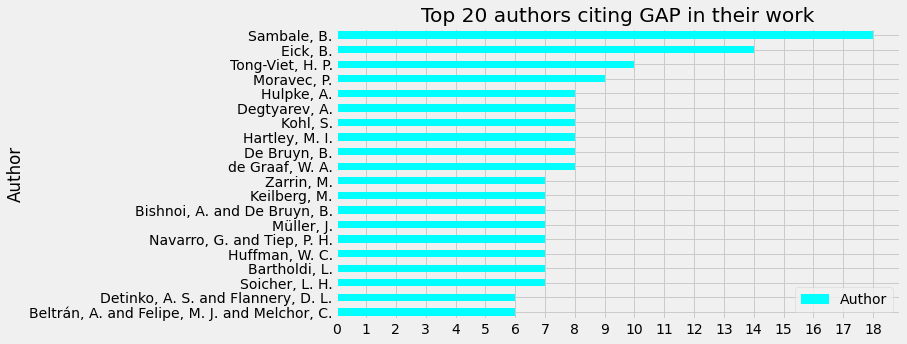

In [38]:
authors = gap_df['Author'].value_counts()
top = authors.head(20)
top = top.sort_values(ascending=True)
top = top.to_frame()
chart = top.plot(kind="barh",
                 figsize=(9,5), title='Top 20 authors citing GAP in their work', 
                 xlabel='Author', 
                 ylabel='Count', color='cyan', 
                  xticks=range(0, 19, 1))
# how do we treat joint papers ?

* Top 20 authors citing GAP Packages

In [39]:
author = pac_df['Author'].value_counts()
top20 = author.head(20)
top20 = top20.sort_values(ascending=False)
top20 = top20.to_frame()
top20

#chart = top20.plot(kind="bar",
#                 figsize=(9,5), title='Top 20 authors citing GAP Packages', 
#                 xlabel='Author', 
#                 ylabel='Count', color='brown', 
#                  xticks=range(0, 19, 1))

,Author
"Koshitani, S. and Müller, J. and Noeske, F.",10
"Bächle, A. and Margolis, L.",10
"Soicher, L. H.",8
"Spreer, J.",7
"Eick, B.",7
"Douglas, A. and Repka, J.",6
"Kohl, S.",6
"Eick, B. and Horn, M.",6
"Müller, J.",6
"Andruskiewitsch, N. and Fantino, F. and Graña, M. and Vendramin, L.",6


### Year
##### Barchart dislaying number of GAP citations per year, with the bars sorted chronologically.
Here we simply use `value_counts()` to get number of entries per year, then plot it as a bar chart which allows us easy comparison between data points.

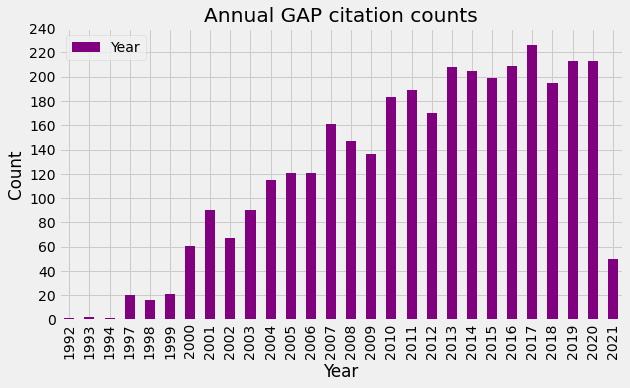

In [40]:
year_chrono = merged_df['Year'].value_counts()
chrono_df = year_chrono.to_frame()
chrono = chrono_df.sort_index()
chrono.plot(kind="bar", figsize=(9, 5), title='Annual GAP citation counts', xlabel='Year', 
                ylabel='Count', color='purple')
plt.yticks(np.arange(0,250, 20))
plt.show()

After looking at the chart we can see that the amount of GAP citations was relatively small upto 1999 and from 2000 onwards its started growing steady to reach around 200 per year in 2013. From there on it kept that level with around 250 in 2017 and 190 in 2018. The data for 2021 is still incomplete. We can conclude that GAP's popularity started to grow in the year of 2000.

### Top 20 journals citing GAP, for selected dataset.
* Users can choose to see top 20 journals for the full data, for the GAP citations only or just for GAP Package citations.

In [41]:
@interact
def jour_df_selector(Dataset = df_list):
    if Dataset == 'GAP Data':
        top_journals = gap_df['Journal'].value_counts()
        top_20 = pd.DataFrame(top_journals.head(20))
        top_20 = top_20.reset_index()
        top_20.columns=['Journal', 'Citations count']
        return top_20
    if Dataset == 'Full Data':
        top_journals = merged_df['Journal'].value_counts()
        top_20 = pd.DataFrame(top_journals.head(20))
        top_20 = top_20.reset_index()
        top_20.columns=['Journal', 'Citations count']
        return top_20
    if Dataset == 'Package Data':
        top_journals = pac_df['Journal'].value_counts()
        top_20 = pd.DataFrame(top_journals.head(20))
        top_20 = top_20.reset_index()
        top_20.columns=['Journal', 'Citations count']
        return top_20


interactive(children=(Dropdown(description='Dataset', options=('Full Data', 'GAP Data', 'Package Data'), value…

"J. Algebra" is the leader in all 3 charts with highest number of GAP citations. The top 5 are the same for Full data and GAP data with just 4th and 5th being reversed. <br>
The top 5 for the Package citations is entirely different however, because GAP packages are cited by different journals and books.

### Top 20 Journals citing GAP for selected time period
* Using this tool we can filter the data we have at our disposal and discover tendencies in citing GAP software over the years.
For instance if we use `Up to` operator with the year of 1998 we will notice firstly that very few records are available and secondly they arem ostly British and American, with one Japanese journal. Then if we start increasing the year gradually, keeping the same operator, we will observe the appearance of new journal names from various countries around the world, such as France, Turkey, Switzerland, Russia, Israel and some international too.

In [42]:
@interact
def jou_by_year(Year=years_list, 
                Operator=['Up to', 'For this year', 'After']):
    column='Year'
    if Operator == 'For this year':
        to_plot = merged_df[merged_df[column] == Year]
        top_journals = to_plot['Journal'].value_counts()
        top_20 = pd.DataFrame(top_journals.head(20))
        top_20 = top_20.reset_index()
        top_20.columns=['Journal', 'Citations count']
        return top_20      
    if Operator == 'Up to':
        to_plot = merged_df[merged_df[column] <= Year]
        top_journals = to_plot['Journal'].value_counts()
        top_20 = pd.DataFrame(top_journals.head(20))
        top_20 = top_20.reset_index()
        top_20.columns=['Journal', 'Citations count']
        return top_20 
    if Operator == 'After':
        to_plot = merged_df[merged_df[column] > Year]
        top_journals = to_plot['Journal'].value_counts()
        top_20 = pd.DataFrame(top_journals.head(20))
        top_20 = top_20.reset_index()
        top_20.columns=['Journal', 'Citations count']
        return top_20  

interactive(children=(Dropdown(description='Year', options=(2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 20…

### Top 15 GAP citing Journals ordered by their average `delay`
* The delay column reflects the difference between the publication date and the release date of the cited GAP version (in years). This difference might be considered as delay in recognizing/picking up/ new GAP releases or it could just be personal preference of publication authors to older GAP releases.
<br>For this table we use `gap_df` dataset, because GAP versions do not apply to GAP Packages, they have their own version systems.

In [43]:
jou_year = gap_df.groupby(['Journal'])['Delay'].mean()
jou_year = pd.DataFrame(data=jou_year)
jou_year = jou_year.sort_values(by='Delay', ascending=False)
jou_year.head(15)

,Delay
Journal,
Electron. J. Linear Algebra,21.0
J. Mach. Learn. Res.,21.0
Atti Accad. Naz. Lincei Rend. Lincei Mat. Appl.,21.0
J. Geom. Phys.,18.0
Bull. Inst. Math. Acad. Sin. (N.S.),14.0
Bull. Amer. Math. Soc. (N.S.),13.0
Ergodic Theory Dynam. Systems,11.0
Vietnam J. Math.,11.0
Front. Math. China,11.0


### The most frequent type of work citing GAP
Looking at the data, it seems GAP is predominantly cited in articles - 3393 times. In the raw data there were several other publication types present, such as `book` `phdthesis` and `mastersthesis`, but they were filtered out durign the data cleaning process, simply because their entries had missing information in too many important columns, making them unfeasible for our further data analysis.

In [44]:
types_pub = pd.DataFrame(merged_df['Publication Type'].value_counts())
types_pub.columns = ['GAP Citations Count']
types_pub.index.names = ['Publication Type']
types_pub

,GAP Citations Count
Publication Type,
article,3383
incollection,43
inproceedings,4


### Interactive table, displaying publication types breakdown for selected year.
The above table, with added interactive element, which allow users to filter the data by year. In the case of our data this tool does not yield diversified results, but if re-used for other datasets, the tool might prove handy.

In [45]:
@interact
def jou_by_year(Year=years_list):
    to_plot = merged_df[merged_df['Year'] == Year]['Publication Type'].value_counts()
    to_plot = pd.DataFrame(data=to_plot)
    to_plot.columns = ['GAP Citations Count']
    to_plot.index.names = ['Publication Type']
    return to_plot


interactive(children=(Dropdown(description='Year', options=(2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 20…

### Accuracy
Fist we can display an overview by plotting the `Accuracy Score` coount of values for each score from 0 to 3.

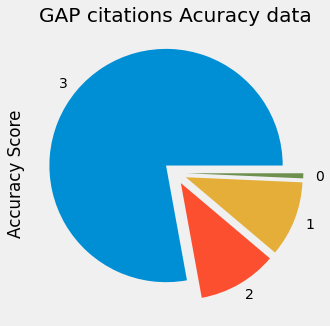

In [46]:
acc = merged_df['Accuracy Score'].value_counts()
acc.plot(kind="pie", figsize=(5, 5), title='GAP citations Acuracy data',
         xlabel='Score', 
         explode=(0.1, 0.1, 0.1, 0.1))
plt.show()

Then we group the data by year and take the mean of Accuracy Score for each group, to derive Annual average of Accuracy sores, which we plot in a line chart.

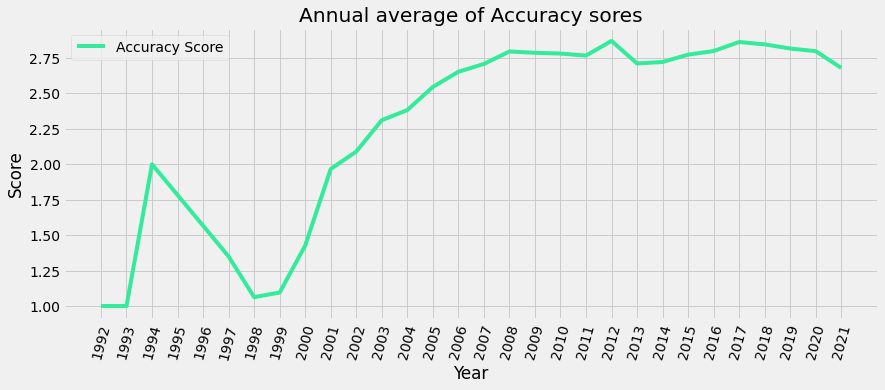

In [47]:
accuracy_mean = merged_df.groupby('Year')['Accuracy Score'].mean()
accuracy_mean = pd.DataFrame(data=accuracy_mean)
accuracy_mean.plot(kind='line', figsize=(13, 5),
         title='Annual average of Accuracy sores',
         xlabel='Year', ylabel='Score', color='#34eb9b')
plt.xticks(range(1992, 2022, 1))
plt.xticks(rotation=75)
plt.show()

In the line chart above we observe a spike in the Accuracy in 1993-4 then it falls again between 1995 and 1999. From there it starts rising again, to reach the maximum of 3 in late 2007. This level is kept until today.

### Releases by year

We will use `gap_df` containing only GAP citations with versions provided, all other entries such as Package citations cannot be used in this part of the analysis because they do not have GAP Versions as such.

In [48]:
versions_cited = gap_df['Version'].unique()
versions_cited

array(['Unknown', '4.7.5', '4.4.12', '4.7.8', '4.3', '4.4', '4.4.4',
       '4.6.4', '4.7.2', '4.6.5', '4.7.9', '4.8.8', '4.8.9', '4.4.10',
       '4.5.7', '4.7.4', '4.7.7', '4.2', '4.6.12', '4.1', '4.10.0',
       '4.8.6', '4.8.2', '4.10.2', '4.11.0', '4.4.2', '4.8.3', '4.8.7',
       '4.6', '4.9.1', '4.4.9', '4.8.4', '4.6.2', '4.9.3', '4.8.10',
       '4.5', '4.4.6', '4.4.7', '4.5.5', '4.4.11', '4.10.1', '4.6.3',
       '3.4', '4.8.5', '4.5.6', '4.11', '4.10', '4.9.2', '4.7.6', '4.6.9',
       '4.5.4', '3.4.4', '4.8', '4.9.0', '4.7', '3.3', '3.0', '1.1',
       '4.5.3', '3.4.3', '1.0', '4.6.1', '4.4.3', '4.8.1', '3.1', '4.4.5',
       '4.46', '4.9', '4.49', '3.2'], dtype=object)

### Number of Citations by year of cited GAP release, in textual and graphic forms.
The table is sorted by citation count in descending order.

In [49]:
rel_years = gap_df['ReleaseYear'].value_counts()
rel_years = pd.DataFrame(data=rel_years)
rel_index = rel_years.index
rel_years.columns=['Count']
rel_years.index.names = ['ReleaseYear']
rel_years

,Count
ReleaseYear,
2004,894
Unknown,484
2002,211
2016,143
2000,122
2013,120
2014,120
1999,105
2015,105


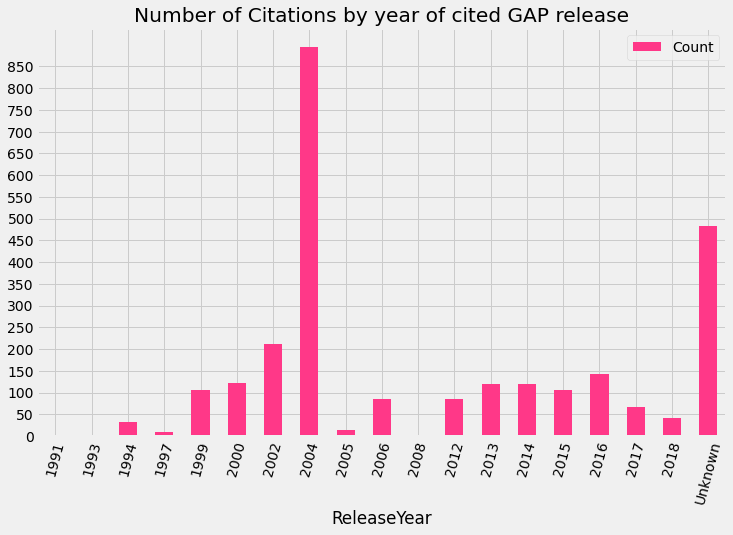

In [50]:
rel_years = rel_years.sort_index()
rel_years.plot(kind='bar', figsize=(11, 7), 
              title='Number of Citations by year of cited GAP release',
              color='#ff3888')
plt.xticks(rotation=75)
plt.yticks(range(0,900,50))
plt.show()

### Types of GAP citing publications by year.
* Articles are the dominating type.

In [51]:
gap_df['Publication Type'].value_counts()

article          2605
incollection       37
inproceedings       4
Name: Publication Type, dtype: int64

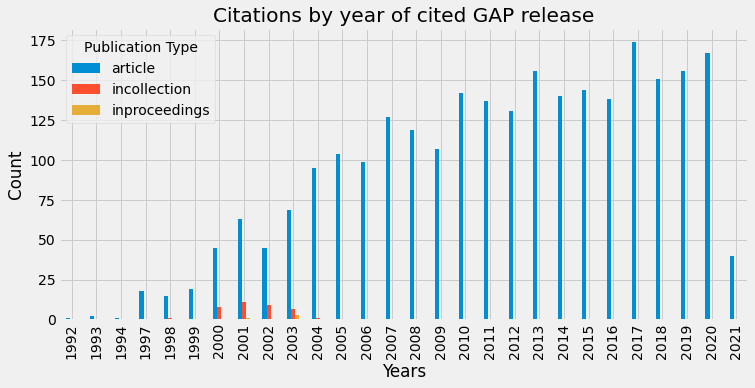

In [52]:
yea = gap_df.groupby(['Publication Type', 'Year'])['Publication Type'].count().unstack('Publication Type').fillna(0)
yea = pd.DataFrame(data=yea)
yea.plot(kind="bar", subplots=False,  
         figsize=(11, 5),
         title='Citations by year of cited GAP release', xlabel='Years', 
         ylabel='Count')
plt.show()

# Delay in picking up new GAP releases
Column `delay` is the result of release year minus publication year values.<br>
Some `ReleaseYear` cells contain `Unknown` hence we have 1816 entries to work with on this query, which is enought to get a good notion of the trends.

In [53]:
gap_df[gap_df['ReleaseYear'] != 'Unknown'].count()

MR                  2162
Author              2162
Journal             2162
Year                2162
Publication Type    2162
MSC                 2162
Citation            2162
Version             2162
Website             2162
Length              2162
Accuracy Score      2162
ReleaseYear         2162
Delay               2162
dtype: int64

There are several negative values, potentially caused by errors in the data sources or somehwere along the pipeline. Their number is insignificant hence I will not investigate further. I will remove them from the `tail` subset of our data for better visualisation readability.

In [54]:
gap_df.loc[gap_df['Delay'] < 0]

,MR,Author,Journal,Year,Publication Type,MSC,Citation,Version,Website,Length,Accuracy Score,ReleaseYear,Delay
248,2408485,"Bailey, R. A. and Cameron, P. J. and Connelly, R.",Amer. Math. Monthly,2008,article,05B15 (94A29 94B99),"The GAP Group, GAP—Groups, Algorithms, and Pro...",4.6,Yes,135,3,2013,-5
736,2299793,"Dabbaghian-Abdoly, V.",Math. Comp.,2007,article,20C40 (20C15),"The GAP Group, GAP—Groups, Algorithms, and Pro...",4.6,Yes,104,3,2013,-6
1560,3422470,"Keilberg, M.",Algebr. Represent. Theory,2015,article,16T05 (16W20 20D99),"GAP. GAP - Groups, Algorithms, and Programming...",4.8.4,Yes,95,3,2016,-1
1981,1958966,"Moore, E. H. and Pollatsek, H.",Des. Codes Cryptogr.,2003,article,05B10 (20D60),"M. Schönert et al., GAP: Groups, Algorithms an...",4.4,No,140,2,2004,-1
2543,2372317,"Wilde, T.",Comm. Algebra,2007,article,20C15,"GAP (2005). The GAP Group, Groups, Algorithms ...",4.6,Yes,102,3,2013,-6


Below is the data in graphical form. The longest delays on record are 22 years but we only have a few such cases - less than 25. The most common delays are between 0 and 4 years, with 0 years leading the chart. We have 527 publications citing GAP versions in the same year these versions were released.

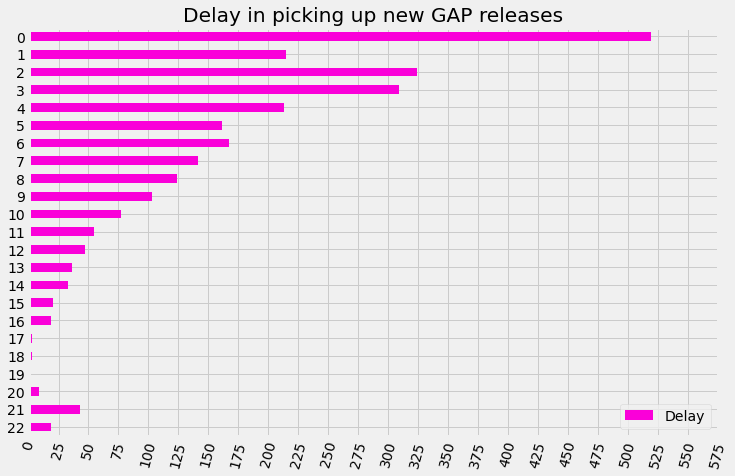

In [55]:
tail = gap_df['Delay'].value_counts()
tail = pd.DataFrame(data=tail)
tail = tail.sort_index(ascending=False)
tail.drop([-1,-5,-6], inplace=True) # to remove negative values
tail.plot.barh(figsize=(11,7), color='#fa00d9', 
              title='Delay in picking up new GAP releases')
plt.xticks(range(0,600,25))
plt.xticks(rotation=75)
plt.show()

More than 525 entries have 0 delay which means GAP versions were cited during the same year they were released, this represents a very good practice. Amongst the entries with positive delay those with 1 to 4 years delay are most common, having more than 200, 0 years being the most frequent.

### Average delay by publication year
First we create a dataframe with the average delay for each publication year. <br>
Then we plot it as a bar chart.

In [56]:
delay_average = gap_df.groupby(['Year'])['Delay'].mean()
delay_average = pd.DataFrame(data=delay_average)
#delay_average = delay_average.sort_values(by='Delay', ascending=False)
delay_average = delay_average.sort_index()
delay_average.to_csv('year_delay.csv', index=False, encoding='utf-8')
delay_average.head(5)

,Delay
Year,
1992,0.000000
1993,2.000000
1994,3.000000
1997,1.055556
1998,0.875000


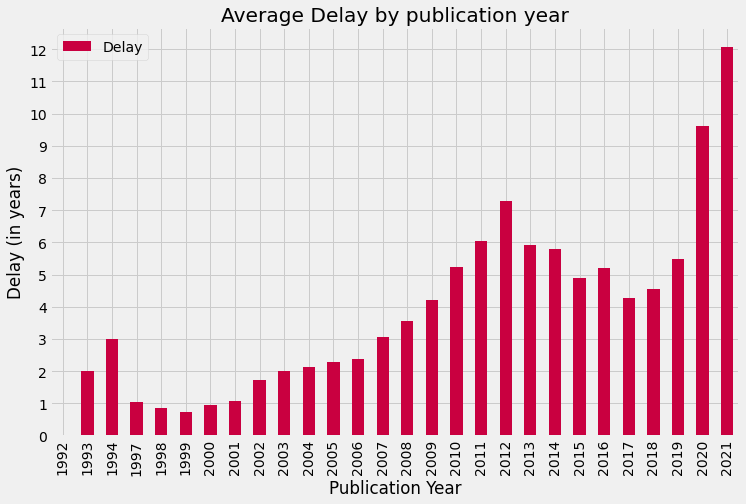

In [57]:
delay_average.plot(kind="bar", color='#c90040', figsize=(11, 7), 
                title='Average Delay by publication year',
                xlabel='Publication Year', 
                ylabel='Delay (in years)')
plt.yticks(range(0,13,1))
plt.show()

For instance, when looking at the chart we can deduce that the average Delay for all GAP Citing publications made in 2015 is almost 5 years – on average the cited GAP release during 2015 was 5 years old. Overall we observe significat delay average values across all years, which at first sight might seem concerning. The average delay is especially high in 2012, 2020 and 2021. This is not entirely a bad practice however, because of several possible reasons – authors:
*	Prefer the older version
*	Chose to use older version because it is better suited to their research needs
*	Do not have access to a newer version
*	Did not need a newer version
*	Did not check if a new version exists


# More Interactive Visualisations

### Dataset timeline filter 
Here we ise `if` loops to introduce 3 operators: `Up To`, ` For This Year`, `After`. Each of them combined with specified year allows users to filter the entire dataset. <br>
As we will see, this filter can be used as a base for various other interactive visualisations.

In [58]:
years_list = gap_df['Year'].unique()
years_list = np.sort(years_list)[::-1] #sort the NumPy array in descending order
#years_list

In [59]:
@interact
def period_selector(Year=years_list, 
                            operator=['Up to', 'For this year', 'After']):
    column='Year'
    if operator == 'For this year':
        return gap_df.loc[gap_df[column] == Year]
    if operator == 'Up to':
        return gap_df.loc[gap_df[column] <= Year]
    if operator == 'After':
        return gap_df.loc[gap_df[column] > Year]

interactive(children=(Dropdown(description='Year', options=(2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 20…

### Interactive pie chart displaying accuracy scores ratio for selected year
Here we combine the accuracy feature value counts with an year selector to filter the data.

In [60]:
@interact
def released_year_selector(Year = years_list):
    description='Select Year:'
    to_plot = merged_df[merged_df['Year'] == Year]
    to_plot = to_plot['Accuracy Score'].value_counts()
    to_plot.plot(kind="pie", figsize=(5, 5), title='Annual GAP citations Acuracy data', xlabel='Score', 
                )
    return plt.show()

interactive(children=(Dropdown(description='Year', options=(2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 20…

### Version breakdown by year
First we set a multi-color pallet. <br>
Then we group the data by version and year taking the version count. <br>
We plot the result in a multi-color bar chart. <br>
For som eyears version numbers exceed number of different colors but still distinction can be made.

In [61]:
my_colors = ['black', '#fc6900', '#7d7d7d', '#538c2a', '#2693ff', 'red',
             'green', '#ff2a00', 'blue', 'yellow', '#00521a',  'purple',
             'cyan', 'gold', '#2d0042', '#c7006a', '#660000', '#05f73e', '#adfc00']

In [62]:
@interact
def released_year_selector(Year = years_list):
    description='Select Year:'
    to_plot = gap_df[gap_df['Year'] == Year]
    to_plot = to_plot.groupby(['Version', 'Year'])['Version'].count().unstack('Version').fillna(0)
    to_plot.plot(kind="bar", figsize=(15, 11),
                        title='GAP versions cited by year', color=my_colors)
    return plt.show()
#    plt.legend(prop={'size': 19})
#    

interactive(children=(Dropdown(description='Year', options=(2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 20…

### Interactive bar chart displaying website statistics, grouped by year, for selected time period.

In [63]:
@interact
def period_selector(Year=years_list, operator=['Up to', 'For this year', 'After']):
    column='Year'
    if operator == 'For this year':
        site_year = gap_df.loc[gap_df[column] == Year]
        site_year = site_year.groupby(['Website', 'Year'])['Year'].count().unstack('Website')
        site_year_df = pd.DataFrame(data=site_year)
        site_year_df.plot(kind="bar", subplots=False, figsize=(11, 5),
                  title='Website statistics by Year', 
                  xlabel='Year', ylabel='Count')
        return plt.show()
    if operator == 'Up to':
        site_year = gap_df.loc[gap_df[column] <= Year]
        site_year = site_year.groupby(['Website', 'Year'])['Year'].count().unstack('Website')
        site_year_df = pd.DataFrame(data=site_year)
        site_year_df.plot(kind="bar", subplots=False, figsize=(11, 5),
                  title='Website statistics by Year', 
                  xlabel='Year', ylabel='Count')
        return plt.show()
    if operator == 'After':
        site_year = gap_df.loc[gap_df[column] > Year]
        site_year = site_year.groupby(['Website', 'Year'])['Year'].count().unstack('Website')
        site_year_df = pd.DataFrame(data=site_year)
        site_year_df.plot(kind="bar", subplots=False, figsize=(11, 5),
                  title='Website statistics by Year', 
                  xlabel='Year', ylabel='Count')
        return plt.show()

interactive(children=(Dropdown(description='Year', options=(2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 20…

### Interactive bar chart allowing user to select a publication year and then displaying numbers of GAP releases cited grouped in separate bars for each release year.
First we create a subset of our data, containing the number of citations per release year.<br>
Then we combine that with the already familiar time filter which allows user to filter the displayed data by year.
This tool can be used for in-depth analysis and investigations.

In [64]:
# we exclude entries with Unknown release year.
filtered_df = gap_df[gap_df['ReleaseYear'] != 'Unknown'] 
df3 = filtered_df.groupby(['Year', 'ReleaseYear'])['MR'].count().unstack('Year').fillna(0)

In [164]:
@interact
def year_selector(Year=years_list):
    description='Select Year:'
    to_plot = df3[Year]
    to_plot.plot.bar(figsize=(7, 5), 
                            title='Number of citations by Release Year for selected Year')
    return plt.show()

interactive(children=(Dropdown(description='Year', options=(2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 20…

### Interactive bar chart allowing user to select Release Year and see the number of citations grouped in bars - one for each Publication year
First we create a list of all Release years, for users to select from in the drop-down, sorted in descending order.

In [66]:
rel_list = filtered_df['ReleaseYear'].unique()
rel_list = np.sort(rel_list)
#rel_list = rel_list.astype(int)
rel_list = np.sort(rel_list)[::-1]
#rel_list

* Then we filter the data and create a new daraframe with a column for each Release year and a row for each year of publication with publication count in every intersecting cell.

In [67]:
df5 = filtered_df.groupby(['ReleaseYear', 'Year'])['MR'].count().unstack('ReleaseYear').fillna(0)
#df5.tail(11)
#df5.index
#df5[df5['ReleaseYear'] == 1997]
#df5.columns
#df5['2000']
#df5.iloc[7].plot.pie(subplots=False, legend=False, figsize=(15, 11))

* FInally we visualise it, allowing users to select Release Year.

In [68]:
@interact
def released_year_selector(ReleaseYear = rel_list):
    description='Select Release Year:'
    to_plot1 = df5[ReleaseYear]
    to_plot1.plot.bar(figsize=(7, 5), title='Number of citations by Year for selected Release Year')
    return plt.show()

interactive(children=(Dropdown(description='ReleaseYear', options=('2018', '2017', '2016', '2015', '2014', '20…

### MSC Codes
Looking at the `MSC` column we have the primary MSC codes, followed by the secondary ones. The secondary MSCs are sometimes several and they are in brackets, in other entries there are no secondary MSCs stated, therefore we need to split the MSC data in two columns, before mapping the codes to a python dictionary to convert them to the corresponding full MSC Area names.

In [69]:
for index, row in merged_df.iterrows():
    print(row['MSC'])

05C25 (05C20 20F05)
13F20 (05E15 14H50)
13F20 (05E15 14H50)
05C25 (20B30 20E45)
20G40 (05C25)
20F45 (20D60 20F19)
20D60
20F99
20D15
20D60
20B30 (20D60)
20F05 (20F28)
16S50 (16P10 16U70)
20F45 (20F18)
20F45 (20F12)
20D45 (20D15)
20D60 (51E21)
20D45
20D60 (05C25)
05C25 (05C50 20D99)
20D60
20F45 (20F18)
20F45 (20F18)
20D60 (05C25 20D15)
20D15 (20J05 20J06)
20F45 (20F19)
05C25
05C25
20F45
20F45
20C15 (05C25 05C50)
05C25 (05C50 15A18 20D60)
05C25 (05C50 15A18 20D60)
05E30 (05C25 20B25 51E12)
20D45 (20D15)
20F10 (20F16)
20D15 (20J06)
20C07 (16S34)
20C15 (05C25)
20C07 (16S34)
20D15 (20D45)
20D15 (20D45)
20D60 (11B13 11P70 16S34 20C05)
20D15 (20E18 20F05)
05B05 (20D10 20F16)
05B05 (05B10)
20N05
20N05
05B10
05B10
05B10
20G40 (20E45)
20C15
57Q15 (52B70 55N35 55U10 57N10 57N13 57Q05)
14G35 (11F32 11G20 14H45 20B25 20C34)
14H30 (14H10 20B25)
05C25 (05C10)
51E15 (05B25)
51E21 (05B25)
11E39 (94B05)
05B25 (05B15 51E15)
11D07 (05B45 05C90 11D45)
11D07 (05B45 05C90 11D45)
05E18
05E18
05C90 (11D45 11P21

55P15 (55Q05 57M20)
55P15 (55Q05 57M20)
20F10 (68Q42)
20F10 (68Q42)
17B10 (17B37)
20B10
20C20 (20C15 20C30)
20C15
17B70
05D05
06A07 (05B35 52B40)
06A07 (05B35 52B40)
06A07 (05B35 52B40)
20C30
20C30
51E20 (05B25)
51E12
51E12
51A45 (51A50)
51E21 (05B25)
68Q70 (68Q19 68Q45)
20C15 (20D60)
20E22
20J06 (20-04 55R40 68W30)
20J06 (20-04 55R40 68W30)
14H37
14H37 (20H10 30F50)
57M25 (57M27)
14M99 (14L30 17B20)
17B08 (17B20)
17B08 (17B20)
53D20 (14L24 17B20 17B70 20G05)
53D20 (14L24 17B20 17B70 20G05)
05B15 (90C10 90C90)
94B27
94B35 (13P10)
20B10
05B07
05B07
17B30 (17B10)
20C15
20B15
20G40 (20B15)
20G40 (20B15)
20G40 (20B15)
20G40 (20B15)
20B15 (20D06 20D08)
20B15 (20D06 20D08)
20B15 (20D05)
20D08 (20B25)
20D08 (20B25)
20D08 (20B25)
20G40 (20B15 20P05)
20G40 (20B15 20P05)
20G40 (20B15 20P05)
20E32 (20E28 20F05 20P05)
20E32 (20E28 20F05 20P05)
20F05 (20D05 20D99 20P05)
20F05 (20D05 20D99 20P05)
20B35 (05C25)
20B35 (05C25)
37J35 (37A35 37A45)
11G10 (11G30)
16S34 (16U60 20C05)
16S34 (16U60 20C05)
16

52C23 (52C22 55R20)
11R21 (12F05)
11R21 (12F05)
20F45 (20F18)
20G40 (20D06)
20D08 (20F05)
05C25
20D08 (20F05)
20D08 (20F05)
20D08 (20P05)
11F22 (14J28 17B69 20D08 81T30)
94A60
20M13 (20M14)
20M14 (13D02)
16T05 (18D10)
16T05
16T05
16T05 (16-04)
16T05
16T05
20M14 (20M05)
20M13 (05A17 20M14)
20M13 (05A17 20M14)
20M14 (05A17 20M13)
20M14 (05A17 20M13)
20M14 (05A17 11D07 14H20)
20M14 (05A17 11D07 14H20)
20M14
20M13 (05A17 20M14)
20M13 (05A17 20M14)
20M13 (05A17 20M14)
20M13 (05A17 20M14)
20M13 (05A17 20M14)
13C40 (13F20 14M10 16W50)
20M14 (13H10 20M13)
20M14
20M14
20E22
20D99 (20D05)
20E45 (20B05)
20D40 (20B05 20D10)
20D40 (20B05 20D10)
20D40 (20B05 20D10)
20D40 (20B15 20B40 20D05 20D10 20D25)
20D40 (20B15 20B40 20D05 20D10 20D25)
20D40 (20B15 20B40 20D05 20D10 20D25)
20D10 (20B35 20D30)
20D30 (20B35)
68W30 (13J30 90C22)
20D15 (20E45)
20E18 (20D15 20F40)
20D15 (20F38)
20D15 (20D45)
20E18 (20E15)
20F10 (68P25 94A60)
20-04 (20F05 68W30)
20F10 (20F36 68W30 68W40)
20F55 (06A07)
20F55 (20C08 20E

20C25 (20C30)
05C10 (05C90 94C15)
11E72 (11D57 11R37 14G05 20D06)
05C50 (05C25)
20C15
20C15 (20D10 20D60 20E45)
20C15
12F12 (14H10 14H30 57M07)
14H30
20C20 (20C40)
20D08 (55Q52 55U10)
20C34 (05E45 20C20)
20D30 (20C20 20D08)
20D15 (20D45)
19A31 (20C11 20E45 20F50)
19A31 (20C11 20E45 20F50)
94A60 (20G40)
94A60 (20F18)
20D06 (20D60)
20D05 (20D60)
35A30 (35A08 35J10 35J25)
17B60 (17B20 17B67)
05E30
05C75 (05E30)
05C70 (05C12 05C25)
05E30
20E08 (28A80)
20M18 (20M99)
20M18 (20M99)
20D06 (20C33)
20H15 (20C15 20F28 20H25)
20H15 (20C15 20F28 20H25)
20D10 (20D20 20E07)
20D08
20C15 (20C33 20C34)
20C33 (20C15)
20C20 (20C05 20C33)
20C20 (20C33)
20C20 (20C33)
20C20 (20C33)
20C20 (20D06 20D08)
05E10 (20C30 20C40)
05E10 (20C30 20C40)
05E10 (20C30 20C40)
05C25 (20B25)
05C70 (05C25 57M10)
20F50
20F50
20F50
94B40 (05B10)
20B15
20B15
05C25 (05B15)
94A17
52C35 (05E15)
20D05
16U60 (16S34 20C05 20C10)
16U60 (16S34 20C05 20C10)
16U60 (16S34 20C05 20C10)
16U60 (05E10 16S34 20C05 20C20)
16U60 (05E10 16S34 20C05

In [70]:
merged_df['MSC Primary'] = [x[:5] for x in merged_df['MSC']]
merged_df['MSC Secondary'] = [x[5:] for x in merged_df['MSC']]

In [71]:
merged_df['MSC Primary'].head()

0    05C25
1    13F20
2    13F20
3    05C25
4    20G40
Name: MSC Primary, dtype: object

In [72]:
merged_df['MSC Secondary'].head()

0     (05C20 20F05)
1     (05E15 14H50)
2     (05E15 14H50)
3     (20B30 20E45)
4           (05C25)
Name: MSC Secondary, dtype: object

Now that we have split Primary and Secondary MSCs in two columns, we need the science area names corresponding to each MSC code.
* First we create the dictionary, using this PDF file provided by MathSciNet. https://mathscinet.ams.org/msnhtml/msc2020.pdf

In [73]:
msc_text = """00 General and overarching topics; collections
01 History and biography
03 Mathematical logic and foundations
05 Combinatorics
06 Order, lattices, ordered algebraic structures
08 General algebraic systems
11 Number theory
12 Field theory and polynomials
13 Commutative algebra
14 Algebraic geometry
15 Linear and multilinear algebra; matrix theory
16 Associative rings and algebras
17 Nonassociative rings and algebras
18 Category theory; homological algebra
19 K-theory
20 Group theory and generalizations
22 Topological groups, Lie groups
26 Real functions
28 Measure and integration
30 Functions of a complex variable
31 Potential theory
32 Several complex variables and analytic spaces
33 Special functions
34 Ordinary differential equations
35 Partial differential equations
37 Dynamical systems and ergodic theory
39 Difference and functional equations
40 Sequences, series, summability
41 Approximations and expansions
42 Harmonic analysis on Euclidean spaces
43 Abstract harmonic analysis
44 Integral transforms, operational calculus
45 Integral equations
46 Functional analysis
47 Operator theory
49 Calculus of variations and optimal control; optimization
51 Geometry
52 Convex and discrete geometry
53 Differential geometry
54 General topology
55 Algebraic topology
57 Manifolds and cell complexes
58 Global analysis, analysis on manifolds
60 Probability theory and stochastic processes
62 Statistics
65 Numerical analysis
68 Computer science
70 Mechanics of particles and systems
74 Mechanics of deformable solids
76 Fluid mechanics
78 Optics, electromagnetic theory
80 Classical thermodynamics, heat transfer
81 Quantum theory
82 Statistical mechanics, structure of matter
83 Relativity and gravitational theory
85 Astronomy and astrophysics
86 Geophysics
90 Operations research, mathematical programming
91 Game theory, economics, social and behavioral sciences
92 Biology and other natural sciences
93 Systems theory; control
94 Information and communication, circuits
97 Mathematics education"""

With the code below we convert the text to a python dictionary, by taking the first two characters from each line - the numbers - as keys, and the rest of each line as value.

In [74]:
msc_dict = {l[:2]: l[3:] for l in msc_text.splitlines()}
msc_dict

{'00': 'General and overarching topics; collections',
 '01': 'History and biography',
 '03': 'Mathematical logic and foundations',
 '05': 'Combinatorics',
 '06': 'Order, lattices, ordered algebraic structures',
 '08': 'General algebraic systems',
 '11': 'Number theory',
 '12': 'Field theory and polynomials',
 '13': 'Commutative algebra',
 '14': 'Algebraic geometry',
 '15': 'Linear and multilinear algebra; matrix theory',
 '16': 'Associative rings and algebras',
 '17': 'Nonassociative rings and algebras',
 '18': 'Category theory; homological algebra',
 '19': 'K-theory',
 '20': 'Group theory and generalizations',
 '22': 'Topological groups, Lie groups',
 '26': 'Real functions',
 '28': 'Measure and integration',
 '30': 'Functions of a complex variable',
 '31': 'Potential theory',
 '32': 'Several complex variables and analytic spaces',
 '33': 'Special functions',
 '34': 'Ordinary differential equations',
 '35': 'Partial differential equations',
 '37': 'Dynamical systems and ergodic theory'

##### Processing the Primary column. 
We will need the first two digits of each MSC code only, so we can map it to our dictionary and convert it to a science area name.

In [75]:
merged_df['MSC Primary'] = [x[:2] for x in merged_df['MSC Primary']] # taking first two digits from each cell
merged_df["MSC Primary"] = merged_df["MSC Primary"].map(msc_dict) # converting digits to science area name
merged_df["MSC Primary"].head() # instepc result

0                       Combinatorics
1                 Commutative algebra
2                 Commutative algebra
3                       Combinatorics
4    Group theory and generalizations
Name: MSC Primary, dtype: object

##### Processing the Secondary column. 
We will use several Python string methods: <br>
First we apply a Regex expression which strips all unnecessary characters, then takes the first two characters of each word (in our case each MSC code).<br>
Then we map the results to our dictionary.<br>
Finally we use `.groupby(level=0).agg(list)` to group the Series by index and put them back into lists.

In [76]:
merged_df["MSC Secondary"] = (
    merged_df["MSC Secondary"]
    .str.extractall(r"[ \(](\w{2})")[0]
    .map(msc_dict)
    .groupby(level=0).agg(list)
)

We need to check the data type for the column and the amount of `NaN` values, to be taken care of.

In [77]:
type(merged_df["MSC Secondary"][1])

list

In [78]:
merged_df["MSC Secondary"].isnull().values.sum()

665

We fill ne `NaN` cells with the string `No`. Then we can use `lambda` with `pd.unique` to remove duplicates.

In [79]:
merged_df["MSC Secondary"] = merged_df["MSC Secondary"].fillna('No')
merged_df["MSC Secondary"] = merged_df["MSC Secondary"].apply(lambda x: list(pd.unique(x)))
merged_df["MSC Secondary"].head(3)

0    [Combinatorics, Group theory and generalizations]
1                  [Combinatorics, Algebraic geometry]
2                  [Combinatorics, Algebraic geometry]
Name: MSC Secondary, dtype: object

In [80]:
type(merged_df["MSC Secondary"][1])

list

* We will create a new dataframe solely for MSC Areas statistics.

In [81]:
msc_df = merged_df["MSC Primary"].value_counts()
msc_df = msc_df.to_frame()
msc_df = msc_df.reset_index()
msc_df.columns = ['MSC Area', 'Primary Count']
msc_df.head()

,MSC Area,Primary Count
0,Group theory and generalizations,1785
1,Combinatorics,420
2,Associative rings and algebras,201
3,Number theory,124
4,Nonassociative rings and algebras,122


* We add another column reflecting the MSC Areas which are only in Secondary but not Primary (in the same row).

* Using`.explode` to further analyse the `MSC Secondary` column, splitting each list in each cell into separate rows.

In [82]:
kin = merged_df.explode('MSC Secondary')
kin

,MR,Author,Journal,Year,Publication Type,MSC,Citation,Version,Website,Length,Accuracy Score,MSC Primary,MSC Secondary
0,4056124,"Abas, M. and Vetrík, T.",Theoret. Comput. Sci.,2020,article,05C25 (05C20 20F05),"GAP – Groups, algorithms, programming - a syst...",Unknown,Yes,104,2,Combinatorics,Combinatorics
0,4056124,"Abas, M. and Vetrík, T.",Theoret. Comput. Sci.,2020,article,05C25 (05C20 20F05),"GAP – Groups, algorithms, programming - a syst...",Unknown,Yes,104,2,Combinatorics,Group theory and generalizations
1,3942387,"Abbas, A. and Assi, A. and García-Sánchez, P. A.",Rev. R. Acad. Cienc. Exactas Fís. Nat. Ser. A ...,2019,article,13F20 (05E15 14H50),"Delgado, M., García-Sánchez, P.A., Morais, J.:...",Package,Yes,183,3,Commutative algebra,Combinatorics
1,3942387,"Abbas, A. and Assi, A. and García-Sánchez, P. A.",Rev. R. Acad. Cienc. Exactas Fís. Nat. Ser. A ...,2019,article,13F20 (05E15 14H50),"Delgado, M., García-Sánchez, P.A., Morais, J.:...",Package,Yes,183,3,Commutative algebra,Algebraic geometry
2,3942387,"Abbas, A. and Assi, A. and García-Sánchez, P. A.",Rev. R. Acad. Cienc. Exactas Fís. Nat. Ser. A ...,2019,article,13F20 (05E15 14H50),"The GAP Group: GAP—groups, algorithms, and pro...",4.7.5,Yes,125,3,Commutative algebra,Combinatorics
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3426,1801202,"Shaw, R.",Des. Codes Cryptogr.,2000,incollection,51E14,"L.H. Soicher, GRAPE: a system for computing wi...",Package,Yes,327,3,Geometry,No
3427,2558870,"Sidki, S. N.",J. Algebra,2009,article,16S50 (15B33 16P90),"L. Bartholdi, Functionally recursive groups, h...",Unknown,Yes,102,2,Associative rings and algebras,Linear and multilinear algebra; matrix theory
3427,2558870,"Sidki, S. N.",J. Algebra,2009,article,16S50 (15B33 16P90),"L. Bartholdi, Functionally recursive groups, h...",Unknown,Yes,102,2,Associative rings and algebras,Associative rings and algebras
3428,2824780,"Tian, Y. and Lu, C.",J. Ind. Manag. Optim.,2011,article,90C20 (90C11 90C46),"X. Sun, C. Liu, D. Li and J. Gao, On duality g...",Unknown,Yes,158,2,"Operations research, mathematical programming","Operations research, mathematical programming"


In [83]:
kin['MSC Secondary'].iloc[1]

'Group theory and generalizations'

* This is how we count the occurences of one MSC Area as secondary, in our dataset.

In [84]:
kin['MSC Secondary'].str.count("Combinatorics").sum()

469

* And we add the other coulmn which counts each occurance of an MSC area as Secondary in our main dataframe `merged_df`.

In [85]:
msc_df['Secondary Count'] = [kin['MSC Secondary'].str.count(x).sum() for x in msc_df['MSC Area']]

In [86]:
msc_df.head()

,MSC Area,Primary Count,Secondary Count
0,Group theory and generalizations,1785,1739
1,Combinatorics,420,469
2,Associative rings and algebras,201,200
3,Number theory,124,203
4,Nonassociative rings and algebras,122,113


We will add a third column to display the count of appearances of each MSC area, as secondary only.

In [87]:
msc_df_sec = kin[kin['MSC Primary'] != kin['MSC Secondary']]
msc_df_sec = msc_df_sec[msc_df_sec['MSC Secondary'] != 'No']

In [88]:
sec = msc_df_sec['MSC Secondary'].value_counts()
sec_df = pd.DataFrame(data=sec)
sec_df = sec_df.reset_index()
sec_df.columns = ['MSC Area', 'Only As Secondary']
sec_df

,MSC Area,Only As Secondary
0,Group theory and generalizations,543
1,Combinatorics,274
2,Computer science,131
3,Number theory,117
4,Associative rings and algebras,87
5,Algebraic geometry,78
6,Manifolds and cell complexes,65
7,Geometry,64
8,"Information and communication, circuits",52
9,Convex and discrete geometry,46


We merge the third column with the existing data-frame, fill null values and fix data type. We also remove the `_merge` column.

In [89]:
new_msc_df = pd.merge(msc_df, sec_df, on='MSC Area', how='left', indicator=True)

In [90]:
new_msc_df = new_msc_df.drop(columns="_merge")
new_msc_df['Only As Secondary'] = new_msc_df['Only As Secondary'].fillna(0)
new_msc_df['Only As Secondary'] = new_msc_df['Only As Secondary'].astype(int)

### MSC Areas classified by number of uses as Primary, Secondary and Secondary only, in GAP Citations

In [91]:
new_msc_df.head(43)

,MSC Area,Primary Count,Secondary Count,Only As Secondary
0,Group theory and generalizations,1785,1739,543
1,Combinatorics,420,469,274
2,Associative rings and algebras,201,200,87
3,Number theory,124,203,117
4,Nonassociative rings and algebras,122,113,43
5,Algebraic geometry,121,155,78
6,"Information and communication, circuits",100,73,52
7,Manifolds and cell complexes,92,118,65
8,Geometry,90,90,64
9,Convex and discrete geometry,67,73,46


### MSC Areas classified by number of uses as Primary in our GAP Citation database

`Group theory and generalizations` with 1791 citations is the most frequently used to categorise GAP citations, followed by `Combinatorics` with 420 and `Associative rings and algebras` with 201 citations. This chart encompasses  the whole data across all years. The next visualisation is interactive and allows the user to filter this same chart by year.

In [92]:
pri = merged_df['MSC Primary'].value_counts()
pri = pd.DataFrame(data=pri)
pri = pri.reset_index()
pri.columns = ['MSC Areas', 'Count']
pri

,MSC Areas,Count
0,Group theory and generalizations,1785
1,Combinatorics,420
2,Associative rings and algebras,201
3,Number theory,124
4,Nonassociative rings and algebras,122
5,Algebraic geometry,121
6,"Information and communication, circuits",100
7,Manifolds and cell complexes,92
8,Geometry,90
9,Convex and discrete geometry,67


### Interactive table displaying most popular MSC Areas used as primary for selected year

In [93]:
@interact
def year_priMSC(Year=years_list):
    description='Select Year:'
    to_plot = merged_df[merged_df['Year'] == Year]
    pri = to_plot['MSC Primary'].value_counts()
    pri = pd.DataFrame(data=pri)
    pri = pri.reset_index()
    pri.columns = ['MSC Areas', 'Count']
    return pri

interactive(children=(Dropdown(description='Year', options=(2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 20…

### Interactive line chart displaying number of uses of selected MSC Area as Primary in GAP Citations

In [94]:
df9 = merged_df.groupby(['MSC Primary', 'Year'])['MR'].count().unstack('MSC Primary').fillna(0)
#df9.head()
msc_list = df9.columns

In [95]:
@interact
def msc_sel(MSC = msc_list):
    description='Select Release Year:'
    to_plot3 = df9[MSC]
    to_plot3.plot.line(figsize=(11, 5),
                title='Number of citations per year for Primary MSC Category', 
                             xlabel='Year', ylabel='Count')
    plt.xticks(range(1992,2021,1))
    plt.xticks(rotation=75)
    return plt.show()

interactive(children=(Dropdown(description='MSC', options=('Algebraic geometry', 'Algebraic topology', 'Associ…

### Table displaying Top 15 MSC Areas or groups, used as Secondary Only in GAP Citations
* 'No' represents the number of citations where no Secondary areas were stated.
`Group theory and generalizations` is the most popular as secondary MSC area, used on its own or combined with others. The number of citations not stating secondary MSC is also high - 665 and takes the second place.

In [96]:
sec = merged_df['MSC Secondary'].value_counts()
sec = pd.DataFrame(data=sec)
sec = sec.reset_index()
sec.columns = ['MSC Areas', 'Count']
sec = sec.head(15)
sec

,MSC Areas,Count
0,[Group theory and generalizations],1148
1,[No],665
2,[Combinatorics],209
3,"[Combinatorics, Group theory and generalizations]",112
4,"[Associative rings and algebras, Group theory ...",100
5,[Number theory],80
6,[Algebraic geometry],64
7,[Nonassociative rings and algebras],58
8,"[Group theory and generalizations, Computer sc...",56
9,[Associative rings and algebras],48


### Interactive table displaying most popular MSC areas used separately or in groups as secondary, for selected year

In [97]:
@interact
def year_priMSC(Year=years_list):
    description='Select Year:'
    to_plot = merged_df[merged_df['Year'] == Year]
    sec = to_plot['MSC Secondary'].value_counts()
    sec = pd.DataFrame(data=sec)
    sec = sec.reset_index()
    sec.columns = ['MSC Areas', 'Count']
    return sec

interactive(children=(Dropdown(description='Year', options=(2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 20…

After selecting all years one by one, `Group theory and generalizations` is definitely the most commonly MSC Area used as secondary, followed by `Combinatorics`. The other one in top 3 is `No` which represents citatiosn without secondary MSC areas being stated.

### Number of uses as Secondary, for selected MSC areas, by Year

In [98]:
df1 = kin.groupby(['MSC Secondary', 'Year'])['MR'].count().unstack('MSC Secondary').fillna(0)
#
df1

MSC Secondary,Abstract harmonic analysis,Algebraic geometry,Algebraic topology,Associative rings and algebras,Biology and other natural sciences,Calculus of variations and optimal control; optimization,Category theory; homological algebra,Combinatorics,Commutative algebra,Computer science,...,Partial differential equations,Probability theory and stochastic processes,Quantum theory,"Sequences, series, summability",Several complex variables and analytic spaces,Special functions,"Statistical mechanics, structure of matter",Statistics,Systems theory; control,"Topological groups, Lie groups"
Year,,,,,,,,,,,,,,,,,,,,,
1992,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1993,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1997,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1999,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2000,0.0,0.0,0.0,3.0,0.0,0.0,3.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2001,0.0,0.0,0.0,4.0,0.0,0.0,0.0,3.0,0.0,16.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
2002,0.0,0.0,0.0,4.0,0.0,0.0,2.0,9.0,1.0,14.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [99]:
sec_list = df1.columns

In [100]:
@interact
def msc_sel(SeconaryMSC = sec_list):
    to_plot3 = df1[SeconaryMSC]
    to_plot3.plot.line(figsize=(11, 3),
                title='Number of uses as Secondary, for selectedMSC areas, by Year', 
                             xlabel='Year', ylabel='Count')
    plt.xticks(np.arange(1991, 2021, 1.0))
    plt.xticks(rotation=75)
    return plt.show()

interactive(children=(Dropdown(description='SeconaryMSC', options=('Abstract harmonic analysis', 'Algebraic ge…

### Number of uses as Primary, for selected single MSC area, by Year


In [101]:
df11 = kin.groupby(['MSC Primary', 'Year'])['MR'].count().unstack('MSC Primary').fillna(0)
df11.head()

MSC Primary,Algebraic geometry,Algebraic topology,Associative rings and algebras,Biology and other natural sciences,Category theory; homological algebra,Combinatorics,Commutative algebra,Computer science,Convex and discrete geometry,Differential geometry,...,"Order, lattices, ordered algebraic structures",Ordinary differential equations,Partial differential equations,Probability theory and stochastic processes,Quantum theory,Several complex variables and analytic spaces,Special functions,Statistics,Systems theory; control,"Topological groups, Lie groups"
Year,,,,,,,,,,,,,,,,,,,,,
1992,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1993,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1997,3.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1998,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [102]:
@interact
def year_priMSC(MSC = df11.columns):
    description='Select Year:'
    to_plot = df11[MSC]
    to_plot.plot.line(figsize=(11, 5),
                title='Number of uses by Year, for MSC areas used as Primary', 
                             xlabel='Year', ylabel='Count')
    plt.xticks(np.arange(1991, 2021, 1.0))
    plt.xticks(rotation=75)
    return plt.show()

interactive(children=(Dropdown(description='MSC', options=('Algebraic geometry', 'Algebraic topology', 'Associ…

# Correlation between Journal and Accuracy Score
We will analyse perform analysis to find out if such correlation exists or not.

### Top 35 journals by number of GAP citations
Journal of Algebra has the most GAP citations - almost 500.

In [103]:
top35 = merged_df.groupby('Journal')['MR'].count()
top35 = top35.sort_values(ascending=False)
top35 = pd.DataFrame(data=top35)
top35.columns=['GAP Citations Count']
top35.head(35)

,GAP Citations Count
Journal,
J. Algebra,499
Comm. Algebra,200
J. Symbolic Comput.,147
J. Algebra Appl.,111
Discrete Math.,106
Internat. J. Algebra Comput.,85
J. Group Theory,81
Des. Codes Cryptogr.,70
J. Pure Appl. Algebra,70


### A table displaying the top 35 Journals by sum of their accuracy scores. 
* The result is heavily impacted by the number of citations by each journal, therefore we will try to find the average in the next section.

In [104]:
fil_df = merged_df.groupby('Journal')['Accuracy Score'].sum()
fil_df = pd.DataFrame(data=fil_df)
fil_df = fil_df.sort_values(by='Accuracy Score', ascending=False)
fil_df.columns=['Total Accuracy Score']
fil_df.head(35)

,Total Accuracy Score
Journal,
J. Algebra,1300
Comm. Algebra,541
J. Symbolic Comput.,354
J. Algebra Appl.,313
Discrete Math.,292
Internat. J. Algebra Comput.,220
J. Group Theory,205
J. Pure Appl. Algebra,195
Des. Codes Cryptogr.,188


### Average Accuracy score for the top 35 journals citing GAP, in our database.

In [105]:
# First we create a list of journals and their average accuracy scores.
jou_lis = fil_df.index
mea_lis = []
for i in jou_lis:
    mea_score = merged_df[merged_df['Journal']==i]['Accuracy Score'].mean()
    mea_lis.append(i)
    mea_lis.append(str(mea_score))

In [151]:
# Then we transform it to pandas dataframe and reshape it so each row has journal name and its average score
mea_lis_df = pd.DataFrame(data=mea_lis)
mea_lis_df.columns=['Journal']
mea_lis_df = pd.DataFrame(mea_lis_df.Journal.values.reshape(-1,2),columns=['Journal','Average Score'])

After looking in the tabular representation below, of average accuracy scores for journals arranged by number of GAP citations, we can see that Journals with highest number of GAP citations do not have perfect accuracy score but are not far off the mark, with averages ranging from 2.4 to 2.89 for the top 35. 

In [162]:
mea_lis_df.head(35)

,Journal,Average Score
0,J. Algebra,2.6052104208416833
1,Comm. Algebra,2.705
2,J. Symbolic Comput.,2.4081632653061225
3,J. Algebra Appl.,2.81981981981982
4,Discrete Math.,2.7547169811320753
5,Internat. J. Algebra Comput.,2.588235294117647
6,J. Group Theory,2.5308641975308643
7,J. Pure Appl. Algebra,2.7857142857142856
8,Des. Codes Cryptogr.,2.6857142857142855
9,LMS J. Comput. Math.,2.901639344262295


In the tail, we find that journals with fewer GAP citations have relatively lower accuracy averages of 1 to 2. This can be explained by with the continuous improvement principle.

In [108]:
mea_lis_df.tail(20)

,Journal,Average Score
268,J. Gökova Geom. Topol. GGT,2.0
269,Nonlinearity,2.0
270,Math. Biosci. Eng.,2.0
271,Arch. Ration. Mech. Anal.,2.0
272,J. Ind. Manag. Optim.,2.0
273,J. Amer. Statist. Assoc.,2.0
274,Adv. Comput. Math.,2.0
275,SIAM J. Sci. Comput.,2.0
276,J. Funct. Anal.,1.0
277,Ann. Sci. École Norm. Sup. (4),1.0


A journal is a sort of a society made of a group of scientists, who often work together and share views, ideas, and practices, including software citation. Therefore, the more times a journal cites certain software the more likely it is that all the authors who write for this journal adopt the same, good set of principles for citing that software.

# Packages

Questions to be answered:
*	What is the proportion of GAP Packages citation against the total number of entries we have?
*	How did the number of GAP Packages citation changes over the years, compared to the number of pure GAP citations?
*	When authors cite a package, how often do they also separately cite GAP?


First we find the number of Packages agains number of all citations.

In [109]:
pac = merged_df[merged_df['Version'] == 'Package']['MR'].count()
full = merged_df[merged_df['Version'] != 'Package']['MR'].count()
print(pac, '/', full)

784 / 2646


Then we can plot the information as two bars in a chart, easy to compare.

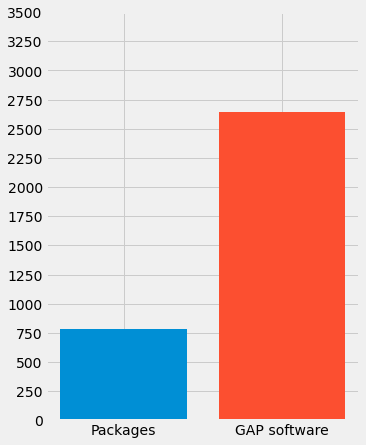

In [110]:
labels = ['Packages', 'GAP software']
data = [pac, full]
fig = plt.figure(figsize =(5, 7))
plt.bar(height = pac, x = 'Packages')
plt.bar(height = full, x = 'GAP software')
plt.yticks(np.arange(0,3700,250))
plt.show()

We can also plot it in a pie chart, addint the percentage ratios.

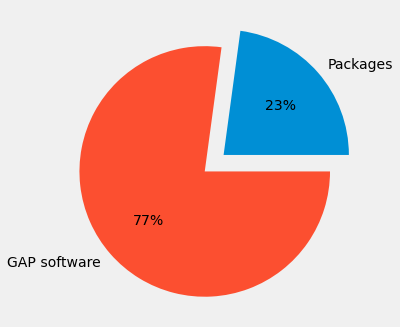

In [111]:
labels = ['Packages', 'GAP software']
data = [pac, full]
fig = plt.figure(figsize =(5, 7))
plt.pie(data, labels = labels, explode = (0.1, 0.1), autopct='%1.0f%%')
plt.show()

This is the annual citation count for GAP Packages only. It follows the same tendency as pure GAP citations, which is to increase rapidly starting from 2000. We can see that GAP packages start being cited since 1997 compared to 1992 for the main GAP software, which indicates Packages probably did not exist until 1997.

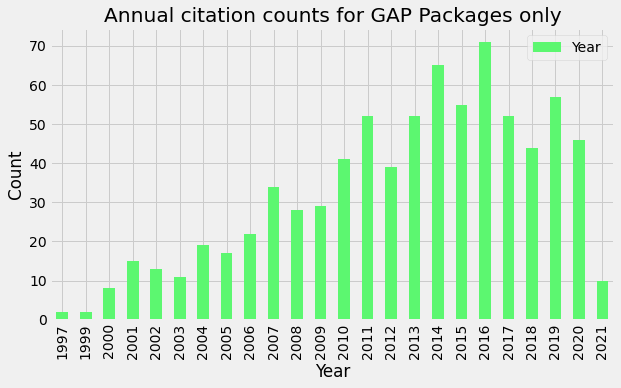

In [112]:
pac_year = pac_df['Year'].value_counts()
chrono_df = pac_year.to_frame()
chrono_pac = chrono_df.sort_index()
chrono_pac.plot(kind="bar", figsize=(9, 5), title='Annual citation counts for GAP Packages only',
            xlabel='Year', 
            ylabel='Count', color='#5cf770')
plt.yticks(np.arange(0,80, 10))
plt.show()

# Package + GAP checker

The GAP website recommends to authors who cite GAP packages to also cite GAP in a separate reference. This is a good practice and we will try to find out how many authors did that.

I have studied the dataframe and identified many cases when authors do cite GAP after they cited a package. This mostly occurs in the next record, but not always. Considering that we need to perform the check for rows having the same MR number, we can use the following custom function, and apply it to the `Version` column of our data grouped by `MR`.

In [113]:
def good_practice_check(s):
    s=set(s)
    if len(s.difference(['Package']))>0:
        if 'Package' in s:
            return 'Yes'
        return np.NaN
    return 'No'

In [114]:
filtered = merged_df.groupby('MR')['Version'].apply(good_practice_check)
filtered = filtered.dropna()
#filtered = pd.DataFrame(data=filtered)
filtered.columns=['Practice']
filtered.name='Authors'
filtered.value_counts()

Yes    465
No     171
Name: Authors, dtype: int64

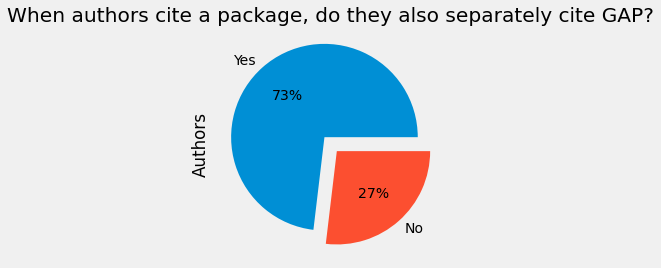

In [115]:
filtered.value_counts().plot.pie(
    title='When authors cite a package, do they also separately cite GAP?',
    explode = (0.1, 0.1), autopct='%1.0f%%')

plt.show()

To summarize from 636 publications (unique MR numbers in our dataset) citing GAP Packages, 465 or 73% cite GAP software separately  after citing the package and 171 or 27% cite only GAP Package without citing GAP in a separate reference. It is great to see that the larger portion of authors did follow GAP guidelines and cited in two separate references.

# Country

Countries data was kindly provided by Dr Alexander Konovalov, who is part of the GAP team.  
The countries file provided is in `.json` format, therefore we need to load it first and then have a first look at it, using the `pprint` library.

Justification about our selection being representative. We are using MathSciNet which indices top level journals worldwide (https://www.ams.org/journals/). But still, there may be a bias into indexing not all parts of the world. Why there may be some of that indeed, we want to show the map to illustrate that we are speaking about citation practices based on the corpus which involved that many countries.

In [116]:
import json
from pprint import pprint

with open('countries.json') as data:
    con = json.load(data)

pprint(con)

{'countries': {'1085773': ['Germany', 'Germany', 'Germany'],
               '1089065': ['Germany', 'Germany'],
               '1112157': ['Germany', 'Germany'],
               '1128656': ['Australia'],
               '1136226': ['England'],
               '1176516': ['Australia'],
               '1176715': ['Germany', 'Germany'],
               '1179271': ['Germany'],
               '1185021': ['Germany', 'Germany'],
               '1195429': ['Germany'],
               '1203878': ['England', 'England'],
               '1213836': ['Germany'],
               '1215552': ['The Netherlands', '48109', 'The Netherlands'],
               '1228206': ['France'],
               '1231011': ['New Zealand'],
               '1235810': ['England'],
               '1239007': ['Australia', 'Australia'],
               '1241915': ['England'],
               '1243835': ['Germany'],
               '1250466': ['Germany', 'Germany'],
               '1256102': ['Australia', 'Australia'],
               '1259

               '1769289': ['France', 'France', 'Ireland'],
               '1769294': ['43403'],
               '1772517': ['Hungary', 'Hungary'],
               '1775788': ['England', 'England'],
               '1775797': ['Germany', 'England'],
               '1776049': ['Turkey', 'Wales'],
               '1776769': ['Australia', 'Australia', 'Australia', '08854'],
               '1779890': ['Germany'],
               '1780211': ['48824'],
               '1780212': ['Sweden', 'Germany'],
               '1783824': ['Germany', 'Germany'],
               '1785438': ['Italy'],
               '1795309': ['Hungary', '85721'],
               '1796665': ['Turkey'],
               '1796706': ['Germany'],
               '1796900': ['02115', '02115'],
               '1798246': ['Russia'],
               '1799483': ['Hungary'],
               '1800032': ['Germany', 'Germany'],
               '1800033': ['Germany', 'Germany'],
               '1800581': ['Italy'],
               '1800730': ['Englan

               '2225499': ['Germany', 'Germany', 'Denmark'],
               '2225761': ['Canada'],
               '2226431': ['Slovenia', 'Slovenia'],
               '2228206': ['The Netherlands'],
               '2228211': ['Germany', 'Germany', 'Germany'],
               '2228215': ['Germany'],
               '2228516': ['Iran'],
               '2228630': ['England', 'England'],
               '2228634': ['Australia', 'Scotland', 'Scotland'],
               '2228637': ['Germany'],
               '2228639': ['England', 'England'],
               '2228640': ['30602', '30602'],
               '2228647': ['England'],
               '2228649': ['Australia', 'Australia'],
               '2228654': ['Germany'],
               '2228655': ['Germany', 'Australia', 'New Zealand'],
               '2229487': ['Australia'],
               '2229881': ['Germany'],
               '2230648': ['Portugal', 'Portugal', 'Portugal'],
               '2232097': ['Australia', 'Scotland'],
               '2232

               '2530749': ['Israel', 'Israel'],
               '2531213': ['Austria', 'Germany', 'Italy'],
               '2531214': ['30602', 'Scotland', 'Scotland'],
               '2531218': ['The Netherlands', 'The Netherlands'],
               '2531220': ['Germany'],
               '2531222': ['98926', 'Australia'],
               '2531223': ['Australia', 'England'],
               '2531224': ['97403', '43210'],
               '2531764': ['Russia', 'Russia'],
               '2533593': ['Russia', 'Russia', 'Russia'],
               '2534124': ['Germany'],
               '2535999': ['Italy', 'Italy', 'Italy'],
               '2536763': ['Germany', 'Germany'],
               '2536771': ['22801'],
               '2536941': ['Italy'],
               '2537368': ['Slovenia'],
               '2537674': ['Spain', 'Spain', 'Poland'],
               '2538016': ['Germany', 'Germany', 'Germany', 'Germany'],
               '2543425': ['Italy', 'Germany'],
               '2544092': ['England'],


               '2960892': ['Portugal', 'Portugal'],
               '2961301': ['South Africa', '44555'],
               '2966827': ['Japan'],
               '2967225': ['New Zealand', 'New Zealand', 'England'],
               '2968225': ['England', '43210'],
               '2968928': ['Germany'],
               '2969025': ['Iran'],
               '2970726': ['Germany', '80523'],
               '2970863': ['Spain', 'Spain', '46323'],
               '2971755': ['Germany'],
               '2974230': ['France', 'France', 'Switzerland'],
               '2975387': ['Italy', 'Russia', 'Germany'],
               '2975410': ['Scotland', 'England'],
               '2976355': ['Italy'],
               '2976393': ['Italy', 'Italy'],
               '2977239': ['France', 'Italy'],
               '2980457': ['Spain', '85721'],
               '2981128': ['Hungary', 'Portugal', 'Hungary'],
               '2981138': ['55057'],
               '2981982': ['Russia'],
               '2982606': ['England'],


                           'Peoples Republic of China',
                           'Peoples Republic of China'],
               '3418031': ['Germany', 'Germany'],
               '3418064': ['Japan'],
               '3418065': ['France', 'France', '33620'],
               '3418068': ['Ireland'],
               '3420524': ['France'],
               '3422357': ['Peoples Republic of China',
                           'Peoples Republic of China',
                           'Canada'],
               '3422375': ['Peoples Republic of China', '44242'],
               '3422377': ['Brazil', 'Brazil'],
               '3422470': ['France', 'France'],
               '3422472': ['Germany', 'England'],
               '3422855': ['Iran', 'Iran'],
               '3424050': ['Turkey', 'Turkey', 'Turkey'],
               '3424052': ['France', 'Spain'],
               '3427628': ['Spain', 'Germany', 'Spain'],
               '3427642': ['Peoples Republic of China', 'Germany'],
               '3428408': ['Pe

               '3724696': ['Portugal', '80208', '22401', 'Portugal'],
               '3725240': ['Portugal', 'Scotland', '10031'],
               '3725940': ['77005', '24061'],
               '3730658': ['Iran', 'Iran', 'Iran'],
               '3730759': ['Iran', 'Algeria', 'Japan', 'Algeria'],
               '3733962': ['Scotland'],
               '3734339': ['Japan'],
               '3734405': ['Peoples Republic of China',
                           'Peoples Republic of China'],
               '3734529': ['70803'],
               '3737287': ['Scotland', 'Scotland'],
               '3739185': ['Australia', '23185'],
               '3739225': ['Scotland', 'Ireland', '80523'],
               '3739324': ['Spain', 'Spain', 'Italy'],
               '3739327': ['Germany', 'Spain', 'Germany'],
               '3741006': ['Austria', 'Canada'],
               '3741064': ['Tunisia'],
               '3741419': ['Finland', 'England'],
               '3743942': ['Belarus', 'Brazil', 'Brazil'],
    

               '4133340': ['Czech Republic', '80208'],
               '4134242': ['Germany'],
               '4134359': ['Italy', 'Italy'],
               '4134829': ['Scotland', 'Ireland', '80523'],
               '4134831': ['England', 'Germany', 'Germany'],
               '4134866': ['Russia', 'Russia'],
               '4135540': ['Germany', 'England'],
               '4135543': ['Germany'],
               '4135544': ['Hungary', 'Hungary', 'Spain', '08854'],
               '4135546': ['08540', '08854'],
               '4135553': ['13901'],
               '4136688': ['Israel', 'Italy'],
               '4141385': ['Belarus', 'Belarus'],
               '4141690': ['Brazil', 'Brazil'],
               '4142064': ['Iran', 'Iran', 'Iran'],
               '4142187': ['Germany'],
               '4142849': ['Spain', 'Italy', 'Spain'],
               '4143003': ['Japan', 'Japan'],
               '4143379': ['Italy', 'Italy', 'Germany', '80217'],
               '4145554': ['Hungary', 'Hungary']

What we have is a dictionary with only one key and one, quite large value where all the tupples MR-countries are located. This large value is what we need to proceed.
We will access it using the dictionary method `.values()` then we will convert it to a list in order to exrtract it.
Finally we will convert the resulting list back to a dictionary.

In [117]:
con_data = con.values() # we access the data we need
values_list = list(con_data) # we convert it to list so we can extract it from the initial dictionary
countries = dict(values_list[0]) # we convert it back to python dictionary format
countries

{'4056124': ['Slovakia', 'South Africa'],
 '3942387': ['France', 'France', 'Spain'],
 '3354065': ['Iran', 'Iran'],
 '3646312': ['Iran', 'Iran', 'Germany'],
 '1864795': ['Iran'],
 '2287843': ['Iran', 'Iran', 'Iran'],
 '2175389': ['Iran', 'Iran', 'Iran', 'Iran'],
 '2149067': ['Iran', 'Iran'],
 '2293309': ['Iran', 'Iran'],
 '2330635': ['Iran', 'Iran', 'Iran'],
 '2458407': ['Iran', 'Iran', 'Iran'],
 '2416600': ['Iran'],
 '2371966': ['Iran'],
 '2650379': ['Iran', 'Iran'],
 '2671230': ['Iran', 'Iran', 'Scotland', 'New Zealand'],
 '2387528': ['Iran', 'Iran', 'Iran'],
 '2424280': ['Iran', 'Iran', 'Iran'],
 '2514858': ['Iran', 'Iran'],
 '2546325': ['Iran', 'Iran'],
 '2725682': ['Iran', 'Iran', 'Iran', 'Iran'],
 '2726552': ['Iran', 'Iran'],
 '2764826': ['Iran', 'Iran'],
 '2824534': ['Iran'],
 '2846396': ['Iran', 'Germany', 'Italy'],
 '3149684': ['Iran', 'Iran'],
 '3297734': ['Iran'],
 '3395696': ['Iran', 'Iran'],
 '3539599': ['Iran', 'Iran', 'Iran'],
 '3654193': ['Iran', 'The Netherlands', 'Iran

Our new dictionary has the MR numberers as key and as values - a list of all countries corresponding to the authors for each MR number. Now we need to add the countries data to our existing dataframe. Before we do that we will convert the MR column to string so its format matches our dictionary. Then we map it storing the result in the new coulmn `Countries`.

In [118]:
merged_df['MR'] = merged_df['MR'].astype(str)

In [119]:
merged_df['Countries'] = merged_df['MR'].map(countries)

The next step is to break the lists of countries so we have one country in each cell. We will use the already familiar `.explode` method on our dataframe. Once done this will help us to further process this new column, because we have two issues still in it:
* all the entries where country should be US are numbers
* there are some null values, where our MR number was not present in the dictionary, or the value corresponding to our MR number was an empty list

In [120]:
countries_bloom = merged_df.explode('Countries')

In [121]:
nulaa = pd.isnull(countries_bloom['Countries'])
nulaa.value_counts()
#countries_bloom[countries_bloom['Countries'] == '']

False    7166
True       61
Name: Countries, dtype: int64

In [122]:
countries_bloom[countries_bloom['Countries'].isnull()]

,MR,Author,Journal,Year,Publication Type,MSC,Citation,Version,Website,Length,Accuracy Score,MSC Primary,MSC Secondary,Countries
54,1416724,"Adler, A.",Proc. London Math. Soc. (3),1997,article,14G35 (11F32 11G20 14H45 20B25 20C34),"M. Schönert et al, GAP: groups, algorithm and ...",Unknown,No,171,1,Algebraic geometry,"[Number theory, Algebraic geometry, Group theo...",NaN
384,2608962,"Barraclough, R. W.",LMS J. Comput. Math.,2010,article,20C15 (20-04 20C34),"The GAP Group. GAP—Groups, Algorithms, and Pro...",4.3,Yes,95,3,Group theory and generalizations,[Group theory and generalizations],NaN
483,2171593,"Bessis, D.",J. Math. Sci. (N.Y.),2005,incollection,55Q20 (55-04 57M05),"D. Bessis and J. Michel, VKCURVE, software pac...",Package,Yes,153,3,Algebraic topology,"[Algebraic topology, Manifolds and cell comple...",NaN
488,1932707,"Bhattacharyya, B.",Trans. Amer. Math. Soc.,2003,article,46L37 (46L55),"The GAP Group, Aachen, St. Andrews, GAP - Grou...",Unknown,Yes,137,2,Functional analysis,[Functional analysis],NaN
518,3836249,"Bishnoi, A. and De Bruyn, B.",J. Algebraic Combin.,2018,article,51E25 (05E30 51E12),"The GAP Group, GAP—Groups, Algorithms, and Pro...",4.7.5,Yes,104,3,Geometry,"[Combinatorics, Geometry]",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3238,3003995,"Ugolini, S.",J. Number Theory,2013,article,11G20,"GAP Group, GAP - groups, algorithms and progra...",Unknown,Yes,79,1,Number theory,[No],NaN
3302,2372317,"Wilde, T.",Comm. Algebra,2007,article,20C15,"GAP (2005). The GAP Group, Groups, Algorithms ...",4.6,Yes,102,3,Group theory and generalizations,[No],NaN
3354,4119478,"Zhong, T. and Tan, Y.",Front. Math. China,2020,article,20D60 (20E34),"The GAP Group. GAP—Groups, Algorithms, and Pro...",4.10.0,Yes,96,3,Group theory and generalizations,[Group theory and generalizations],NaN
3365,3864855,"Amiri, M.",Internat. J. Algebra Comput.,2018,article,20D45 (20B05),"The Gap group, Gap-groups, algorithms, and pro...",4.4.10,Yes,106,3,Group theory and generalizations,[Group theory and generalizations],NaN


We will fill null values with a string 'No Country Data'

In [123]:
countries_bloom.loc[(countries_bloom['Countries'].isnull(), 'Countries')] = 'No Country Data'

In [124]:
#countries_bloom['Countries'].str.contains(r'[0-9]')

In [125]:
#countries_bloom['Countries'] = countries_bloom['Countries'].astype(str)

In [126]:
#countries_bloom['Countries'].apply(us_update, axis=1)

In [127]:
#numeric_df = countries_bloom.loc[maska]

In [128]:
countries_bloom.loc[(countries_bloom['Countries'].str.isnumeric(), 'Countries')] = 'United States'

#countries_bloom.loc[maska]['Countries']

In [129]:
countries_bloom[countries_bloom['Countries'] == 'United States']

,MR,Author,Journal,Year,Publication Type,MSC,Citation,Version,Website,Length,Accuracy Score,MSC Primary,MSC Secondary,Countries
46,3449941,"Aboras, M. and Vojtěchovský, P.",Comm. Algebra,2016,article,20N05,"The GAP Group, GAP - Groups, Algorithms, and P...",4.5.7,Yes,105,3,Group theory and generalizations,[No],United States
46,3449941,"Aboras, M. and Vojtěchovský, P.",Comm. Algebra,2016,article,20N05,"The GAP Group, GAP - Groups, Algorithms, and P...",4.5.7,Yes,105,3,Group theory and generalizations,[No],United States
47,3449941,"Aboras, M. and Vojtěchovský, P.",Comm. Algebra,2016,article,20N05,"Nagy, G. P., Vojtěchovský, P. LOOPS: Computing...",Package,Yes,151,3,Group theory and generalizations,[No],United States
47,3449941,"Aboras, M. and Vojtěchovský, P.",Comm. Algebra,2016,article,20N05,"Nagy, G. P., Vojtěchovský, P. LOOPS: Computing...",Package,Yes,151,3,Group theory and generalizations,[No],United States
51,2986074,"Adan-Bante, E. and Harris, J. M.",Bol. Soc. Mat. Mexicana (3),2011,article,20G40 (20E45),"T. G. Group, GAP - Groups, Algorithms, and Pro...",4.4.10,Yes,103,3,Group theory and generalizations,[Group theory and generalizations],United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3409,3503387,"Kiers, C. and O'Neill, C. and Ponomarenko, V.",Comm. Algebra,2016,article,20M14 (11A51),"Delgado, M., García-Sanchez, P., Morais, J. (2...",Package,Yes,144,3,Group theory and generalizations,[Number theory],United States
3409,3503387,"Kiers, C. and O'Neill, C. and Ponomarenko, V.",Comm. Algebra,2016,article,20M14 (11A51),"Delgado, M., García-Sanchez, P., Morais, J. (2...",Package,Yes,144,3,Group theory and generalizations,[Number theory],United States
3413,3750929,"Long, D. D. and Thistlethwaite, M. B.",Exp. Math.,2018,article,22E40 (20H10),"Groups, Algorithms, Programming – A System for...",Unknown,Yes,106,2,"Topological groups, Lie groups",[Group theory and generalizations],United States
3413,3750929,"Long, D. D. and Thistlethwaite, M. B.",Exp. Math.,2018,article,22E40 (20H10),"Groups, Algorithms, Programming – A System for...",Unknown,Yes,106,2,"Topological groups, Lie groups",[Group theory and generalizations],United States


# Maps  
First of all we need to prepare our data, so that our country names match exactly those in the Geographical `geojson` file, we will use to draw the borders on the choropleth map.

As we can see, after scrolling through the Geographical data, the country names in our citations dataframe are different from those in the `json` file with coordinates. We need them to be the same, so we will update our country names where necessary.

In [130]:
import json
from pprint import pprint

with open('world-countries.json') as data:
    geo = json.load(data)

pprint(geo)

{'features': [{'geometry': {'coordinates': [[[61.210817, 35.650072],
                                             [62.230651, 35.270664],
                                             [62.984662, 35.404041],
                                             [63.193538, 35.857166],
                                             [63.982896, 36.007957],
                                             [64.546479, 36.312073],
                                             [64.746105, 37.111818],
                                             [65.588948, 37.305217],
                                             [65.745631, 37.661164],
                                             [66.217385, 37.39379],
                                             [66.518607, 37.362784],
                                             [67.075782, 37.356144],
                                             [67.83, 37.144994],
                                             [68.135562, 37.023115],
                                       

                                              [-96.787937, -71.952971],
                                              [-96.20035, -72.521205],
                                              [-96.983765, -72.442864],
                                              [-98.198083, -72.482035],
                                              [-99.432013, -72.442864],
                                              [-100.783455, -72.50162],
                                              [-101.801868, -72.305663],
                                              [-102.330725, -71.894164],
                                              [-102.330725, -71.894164],
                                              [-101.703967, -71.717792],
                                              [-100.430919, -71.854993],
                                              [-98.98155, -71.933334]]],
                                            [[[-68.451346, -70.955823],
                                              [-68.333834, 

                                              [142.143706, -11.042737],
                                              [142.51526, -10.668186],
                                              [142.79731, -11.157355],
                                              [142.866763, -11.784707],
                                              [143.115947, -11.90563],
                                              [143.158632, -12.325656],
                                              [143.522124, -12.834358],
                                              [143.597158, -13.400422],
                                              [143.561811, -13.763656]]]],
                            'type': 'MultiPolygon'},
               'id': 'AUS',
               'properties': {'name': 'Australia'},
               'type': 'Feature'},
              {'geometry': {'coordinates': [[[16.979667, 48.123497],
                                             [16.903754, 47.714866],
                                             [

              {'geometry': {'coordinates': [[[91.696657, 27.771742],
                                             [92.103712, 27.452614],
                                             [92.033484, 26.83831],
                                             [91.217513, 26.808648],
                                             [90.373275, 26.875724],
                                             [89.744528, 26.719403],
                                             [88.835643, 27.098966],
                                             [88.814248, 27.299316],
                                             [89.47581, 28.042759],
                                             [90.015829, 28.296439],
                                             [90.730514, 28.064954],
                                             [91.258854, 28.040614],
                                             [91.696657, 27.771742]]],
                            'type': 'Polygon'},
               'id': 'BTN',
               'properties'

                                              [-90.969661, 76.074013],
                                              [-89.822238, 75.847774],
                                              [-89.187083, 75.610166],
                                              [-87.838276, 75.566189],
                                              [-86.379192, 75.482421],
                                              [-84.789625, 75.699204],
                                              [-82.753445, 75.784315],
                                              [-81.128531, 75.713983],
                                              [-80.057511, 75.336849],
                                              [-79.833933, 74.923127],
                                              [-80.457771, 74.657304],
                                              [-81.948843, 74.442459],
                                              [-83.228894, 74.564028],
                                              [-86.097452, 74.410032],
      

                                             [17.82654, 0.288923],
                                             [17.774192, 0.855659],
                                             [17.898835, 1.741832],
                                             [18.094276, 2.365722],
                                             [18.393792, 2.900443],
                                             [18.453065, 3.504386],
                                             [18.542982, 4.201785],
                                             [18.932312, 4.709506],
                                             [19.467784, 5.031528],
                                             [20.290679, 4.691678],
                                             [20.927591, 4.322786],
                                             [21.659123, 4.224342],
                                             [22.405124, 4.02916],
                                             [22.704124, 4.633051],
                                             [22.8

                                             [25, 29.238655],
                                             [24.70007, 30.04419],
                                             [24.95762, 30.6616],
                                             [24.80287, 31.08929],
                                             [25.16482, 31.56915],
                                             [26.49533, 31.58568],
                                             [27.45762, 31.32126],
                                             [28.45048, 31.02577],
                                             [28.91353, 30.87005],
                                             [29.68342, 31.18686],
                                             [30.09503, 31.4734],
                                             [30.97693, 31.55586],
                                             [31.68796, 31.4296],
                                             [31.96041, 30.9336],
                                             [32.19247, 31.26034],
    

              {'geometry': {'coordinates': [[[-46.76379, 82.62796],
                                             [-43.40644, 83.22516],
                                             [-39.89753, 83.18018],
                                             [-38.62214, 83.54905],
                                             [-35.08787, 83.64513],
                                             [-27.10046, 83.51966],
                                             [-20.84539, 82.72669],
                                             [-22.69182, 82.34165],
                                             [-26.51753, 82.29765],
                                             [-31.9, 82.2],
                                             [-31.39646, 82.02154],
                                             [-27.85666, 82.13178],
                                             [-24.84448, 81.78697],
                                             [-22.90328, 82.09317],
                                             [-22.07175,

              {'geometry': {'coordinates': [[[-6.197885, 53.867565],
                                             [-6.032985, 53.153164],
                                             [-6.788857, 52.260118],
                                             [-8.561617, 51.669301],
                                             [-9.977086, 51.820455],
                                             [-9.166283, 52.864629],
                                             [-9.688525, 53.881363],
                                             [-8.327987, 54.664519],
                                             [-7.572168, 55.131622],
                                             [-7.366031, 54.595841],
                                             [-7.572168, 54.059956],
                                             [-6.95373, 54.073702],
                                             [-6.197885, 53.867565]]],
                            'type': 'Polygon'},
               'id': 'IRL',
               'properties

              {'geometry': {'coordinates': [[[-7.712159, 4.364566],
                                             [-7.974107, 4.355755],
                                             [-9.004794, 4.832419],
                                             [-9.91342, 5.593561],
                                             [-10.765384, 6.140711],
                                             [-11.438779, 6.785917],
                                             [-11.199802, 7.105846],
                                             [-11.146704, 7.396706],
                                             [-10.695595, 7.939464],
                                             [-10.230094, 8.406206],
                                             [-10.016567, 8.428504],
                                             [-9.755342, 8.541055],
                                             [-9.33728, 7.928534],
                                             [-9.403348, 7.526905],
                                           

                                             [115.985096, 45.727235],
                                             [114.460332, 45.339817],
                                             [113.463907, 44.808893],
                                             [112.436062, 45.011646],
                                             [111.873306, 45.102079],
                                             [111.348377, 44.457442],
                                             [111.667737, 44.073176],
                                             [111.829588, 43.743118],
                                             [111.129682, 43.406834],
                                             [110.412103, 42.871234],
                                             [109.243596, 42.519446],
                                             [107.744773, 42.481516],
                                             [106.129316, 42.134328],
                                             [104.964994, 41.59741],
                     

                                              [174.248517, -41.770008],
                                              [173.876447, -42.233184],
                                              [173.22274, -42.970038],
                                              [172.711246, -43.372288],
                                              [173.080113, -43.853344],
                                              [172.308584, -43.865694],
                                              [171.452925, -44.242519],
                                              [171.185138, -44.897104],
                                              [170.616697, -45.908929],
                                              [169.831422, -46.355775],
                                              [169.332331, -46.641235],
                                              [168.411354, -46.619945],
                                              [167.763745, -46.290197],
                                              [166.676886, -46.21

               'properties': {'name': 'Portugal'},
               'type': 'Feature'},
              {'geometry': {'coordinates': [[[-62.685057, -22.249029],
                                             [-62.291179, -21.051635],
                                             [-62.265961, -20.513735],
                                             [-61.786326, -19.633737],
                                             [-60.043565, -19.342747],
                                             [-59.115042, -19.356906],
                                             [-58.183471, -19.868399],
                                             [-58.166392, -20.176701],
                                             [-57.870674, -20.732688],
                                             [-57.937156, -22.090176],
                                             [-56.88151, -22.282154],
                                             [-56.473317, -22.0863],
                                             [-55.797958, -22.356

              {'geometry': {'coordinates': [[[42.779332, 16.347891],
                                             [42.649573, 16.774635],
                                             [42.347989, 17.075806],
                                             [42.270888, 17.474722],
                                             [41.754382, 17.833046],
                                             [41.221391, 18.6716],
                                             [40.939341, 19.486485],
                                             [40.247652, 20.174635],
                                             [39.801685, 20.338862],
                                             [39.139399, 21.291905],
                                             [39.023696, 21.986875],
                                             [39.066329, 22.579656],
                                             [38.492772, 23.688451],
                                             [38.02386, 24.078686],
                                     

              {'geometry': {'coordinates': [[[1.865241, 6.142158],
                                             [1.060122, 5.928837],
                                             [0.836931, 6.279979],
                                             [0.570384, 6.914359],
                                             [0.490957, 7.411744],
                                             [0.712029, 8.312465],
                                             [0.461192, 8.677223],
                                             [0.365901, 9.465004],
                                             [0.36758, 10.191213],
                                             [-0.049785, 10.706918],
                                             [0.023803, 11.018682],
                                             [0.899563, 10.997339],
                                             [0.772336, 10.470808],
                                             [1.077795, 10.175607],
                                             [1.425061, 

                                              [-81.31371, 30.03552],
                                              [-80.98, 29.18],
                                              [-80.535585, 28.47213],
                                              [-80.53, 28.04],
                                              [-80.056539, 26.88],
                                              [-80.088015, 26.205765],
                                              [-80.13156, 25.816775],
                                              [-80.38103, 25.20616],
                                              [-80.68, 25.08],
                                              [-81.17213, 25.20126],
                                              [-81.33, 25.64],
                                              [-81.71, 25.87],
                                              [-82.24, 26.73],
                                              [-82.70515, 27.49504],
                                              [-82.85526, 27.88624],

                                             [32.203389, -28.752405],
                                             [31.521001, -29.257387]],
                                            [[28.978263, -28.955597],
                                             [28.5417, -28.647502],
                                             [28.074338, -28.851469],
                                             [27.532511, -29.242711],
                                             [26.999262, -29.875954],
                                             [27.749397, -30.645106],
                                             [28.107205, -30.545732],
                                             [28.291069, -30.226217],
                                             [28.8484, -30.070051],
                                             [29.018415, -29.743766],
                                             [29.325166, -29.257387],
                                             [28.978263, -28.955597]]],
                     

In [131]:
countries_bloom.replace('United States', "United States of America", inplace = True)
countries_bloom.replace('England', "United Kingdom", inplace = True)
countries_bloom.replace('Peoples Republic of China', "China", inplace = True)
countries_bloom.replace('Taiwan (R.O.C.)', "Taiwan", inplace = True)
countries_bloom.replace('Scotland', "United Kingdom", inplace = True)
countries_bloom.replace('The Netherlands', "Netherlands", inplace = True)
countries_bloom.replace('Wales', "United Kingdom", inplace = True)
countries_bloom.replace('Republic of Korea', "South Korea", inplace = True)
countries_bloom.replace('Serbia', "Republic of Serbia", inplace = True)
countries_bloom.replace('Socialist Republic of Vietnam', "Vietnam", inplace = True)
countries_bloom.replace('Bosnia-Hercegovina', "Bosnia and Herzegovina", inplace = True)
countries_bloom.replace('England', "United", inplace = True)
countries_bloom.replace('England', "United", inplace = True)
countries_bloom.replace('England', "United", inplace = True)
countries_bloom.replace('England', "United", inplace = True)

Then where prepare the exact data we will map, which is the number of participations in GAP citing papers of authors from each country, as explained below. For this purpose we simply take the count of each unique value in the "Countries" column from the `exploded` data. Then we convert it to a pandas dataframe, add index and sort in descending order so we have a chart, name the columns and finally we export to `.csv` file which is then loaded in our choropleth map.

In [132]:
to_map = countries_bloom['Countries'].value_counts()
c_data = pd.DataFrame(data=to_map)
c_data = c_data.reset_index()
c_data.columns=['Country', 'Citations']
c_data.to_csv('citations_countries.csv', index=False, encoding='utf-8')

* It is very important to note that, because most papers citing GAP have multiple authors, we cannot assign a single country to one citation. Therefore, the table below represents the total count of each authors occurance in the data, converted to their country of origin. In other words the table is a result of the exploded data, which is broken down to a row for each country. For instance if a citation had 3 american authors it was broken into 3 lines having US as country each - resulting in +3 points for the US country count not one. The map further down is drawn from this table hence it also represents the same type of data.  
##### To summarise the citations column below represents the count of every time an author originating from this country participated in a paper citing the GAP software.

In [133]:
c_data.head(35)

,Country,Citations
0,United States of America,1155
1,Germany,856
2,United Kingdom,802
3,Spain,452
4,Iran,384
5,Italy,379
6,Australia,282
7,China,255
8,Canada,186
9,Russia,176


After inspecting the whole table, made of 71 rows, we discover that most entries have lower counts. For instance all entries after 35th position are below 25, then everything between 25th and 17th is between 25 and 100, then between 17th and 4th all entries are ranging from 100 to ~450. Finally the top 3 are above 800.  
Having noted all that we need to partition our bins accordingly.  
After many tests with different bins and colour shcemes, we decided on the following bins `[1, 15, 25, 50, 75, 150, 200, 400, 1200]` and a single colour scheme `Greens`.  
The stronger the green colour saturation is the higher number of citations we have for the country on the map.

### GAP Citations Count Map

* I have placed comments along with the code, explaining each step in the process of creatign our map.

In [134]:
import pandas as pd
import os
import folium
import branca
from folium.features import GeoJsonPopup, GeoJsonTooltip
# we define our data which will dictate the choropleth colour scheme
country_count = pd.read_csv('citations_countries.csv')
# we add the geographical coordinates data
country_geo = os.path.join('world-countries.json')
# we define the base map - in our case the whole world
# here we also set the initial view, layout type and initial zoom level
m = folium.Map(location=[0, 0], tiles="OpenStreetMap", zoom_start=1)

tooltip = GeoJsonTooltip(
    fields=["Country", "Citations"],
    aliases=["Country", "Citations"],
    localize=True,
    sticky=False,
    labels=True,
    style="""
        background-color: #F0EFEF;
        border: 2px solid black;
        border-radius: 3px;
        box-shadow: 3px;
    """,
    max_width=800,
)

# now we start building on top of the base
# in our case it will be one choropleth layer
choropleth = folium.Choropleth(
 geo_data=country_geo,
 name='choropleth',
 data=country_count,
 columns=['Country', 'Citations'], # columns to be used from our data
 key_on='feature.properties.name', # matching elements from the `geojson` data
 fill_color='Purples', # main colour scheme
 fill_opacity=1, # main colour scheme opacity
 line_opacity=0.7, # borders opacity
 legend_name="Citations Count",
    nan_fill_color="white", # missing values color
    nan_fill_opacity=1, # missing values opacity
    highlight=True, # `mouse on` highliht feature for each country
    bins=[0, 100, 200, 300, 500, 750, 1000, 1200], # legend bins
    tooltip = tooltip
).add_to(m)



# layers filter, in case we add more layers later on
folium.LayerControl().add_to(m) 

# we load the map in the notebook (we can also save it as HTML file)
m

In [135]:
country_count["Citations"].quantile()

23.0

### GAP Citations Accuracy Score Map

In [163]:
acc = countries_bloom.groupby(['Countries'])['Accuracy Score'].mean()
acc = pd.DataFrame(data=acc)
acc = acc.sort_values(by='Accuracy Score', ascending=False)
acc = acc.reset_index()
acc.to_csv('accuracy_countries.csv', index=False, encoding='utf-8')
acc

,Countries,Accuracy Score
0,Albania,3.00
1,Egypt,3.00
2,Taiwan,3.00
3,Romania,3.00
4,Republic of Serbia,3.00
...,...,...
66,Denmark,2.20
67,Slovakia,2.13
68,Tunisia,2.00
69,Cyprus,1.86


In [137]:
# we define our data which will dictate the choropleth colour scheme
accuracy_mean = pd.read_csv('accuracy_countries.csv')
# we add the geographical coordinates data
country_geo = os.path.join('world-countries.json')
# we define the base map - in our case the whole world
# here we also set the initial view, layout type and initial zoom level
m = folium.Map(location=[0, 0], tiles="OpenStreetMap", zoom_start=1)

tooltip = GeoJsonTooltip(
    fields=["Countries", "Accuracy Score"],
    aliases=["Countries", "Accuracy Score"],
    localize=True,
    sticky=False,
    labels=True,
    style="""
        background-color: #F0EFEF;
        border: 2px solid black;
        border-radius: 3px;
        box-shadow: 3px;
    """,
    max_width=800,
)

popup = GeoJsonPopup(
    fields=["Countries", "Accuracy Score"],
    aliases=["Countries", "Accuracy Score"],
    localize=True,
    labels=True,
    style="background-color: yellow;",
)

# now we start building on top of the base
# in our case it will be one choropleth layer
choropleth = folium.Choropleth(
    geo_data=country_geo,
    name='choropleth1',
    data=accuracy_mean,
    columns=['Countries', 'Accuracy Score'], # columns to be used from our data
    key_on='feature.properties.name', # matching elements from the `geojson` data
    fill_color='Greens', # main colour scheme
    fill_opacity=1, # main colour scheme opacity
    line_opacity=0.7, # borders opacity
    legend_name="Accuracy Score Average",
    nan_fill_color="white", # missing values color
    nan_fill_opacity=1, # missing values opacity
    highlight=True, # `mouse on` highliht feature for each country
    bins=[0.5, 1, 1.5, 2, 2.5, 3], # legend bins
    tooltip=tooltip,
    popup=popup
).add_to(m)



# layers filter, in case we add more layers later on
folium.LayerControl().add_to(m) 

# we load the map in the notebook (we can also save it as HTML file)
m

### Average GAP Citations Length Map
First we create a dataframe, with two columns - Country and its average Lenght.<br>
Then we use it as data input to another map.

In [165]:
length_av = countries_bloom.groupby(['Countries'])['Length'].mean()
length_av = pd.DataFrame(data=length_av)
length_av = length_av.sort_values(by='Length', ascending=False)
length_av = length_av.reset_index()
length_av.to_csv('length_countries.csv', index=False, encoding='utf-8')
length_av.head()

,Countries,Length
0,Morocco,179.67
1,Cyprus,176.71
2,Tunisia,176.00
3,Pakistan,158.29
4,Austria,157.66


In [139]:
# we define our data which will dictate the choropleth colour scheme
accuracy_mean = pd.read_csv('length_countries.csv')
# we add the geographical coordinates data
country_geo = os.path.join('world-countries.json')
# we define the base map - in our case the whole world
# here we also set the initial view, layout type and initial zoom level
m = folium.Map(location=[0, 0], tiles="OpenStreetMap", zoom_start=1)

tooltip = GeoJsonTooltip(
    fields=["Countries", "Length"],
    aliases=["Countries", "Length"],
    localize=True,
    sticky=False,
    labels=True,
    style="""
        background-color: #F0EFEF;
        border: 2px solid black;
        border-radius: 3px;
        box-shadow: 3px;
    """,
    max_width=800,
)

popup = GeoJsonPopup(
    fields=["Countries", "Length"],
    aliases=["Countries", "Length"],
    localize=True,
    labels=True,
    style="background-color: yellow;",
)

# now we start building on top of the base
# in our case it will be one choropleth layer
choropleth = folium.Choropleth(
    geo_data=country_geo,
    name='choropleth1',
    data=accuracy_mean,
    columns=['Countries', 'Length'], # columns to be used from our data
    key_on='feature.properties.name', # matching elements from the `geojson` data
    fill_color='Blues', # main colour scheme
    fill_opacity=1, # main colour scheme opacity
    line_opacity=0.7, # borders opacity
    legend_name="Citations Average Length",
    nan_fill_color="white", # missing values color
    nan_fill_opacity=1, # missing values opacity
    highlight=True, # `mouse on` highliht feature for each country
    bins=[85, 100, 115, 130, 150, 165, 180], # legend bins
    tooltip=tooltip,
    popup=popup
).add_to(m)



# layers filter, in case we add more layers later on
folium.LayerControl().add_to(m) 

# we load the map in the notebook (we can also save it as HTML file)
m